In [ ]:
main - https://chat.openai.com/c/411d9eaf-42f1-4e3b-a6e1-d0334c72210c

https://chat.openai.com/c/076a6ef0-d9f5-446f-a2c5-d7bebfff5f6d

## Top2Vec

https://github.com/ddangelov/Top2Vec

In [ ]:
#@title Notes
#check for NaT none
# import pandas as pd


# # Check if there are any NaT values in the 'created' column
# has_nat_values = df['updated'].isna().any()

# # Print the result
# print(has_nat_values)

In [ ]:
#@title Installing Top2Vec
%%capture
!pip install top2vec
!pip install top2vec[sentence_encoders]

### Data

In [ ]:
#@title Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Data
import pandas as pd

# Если нету на гугл драйв
# !wget https://huggingface.co/datasets/CCRss/arXiv_dataset/resolve/main/data/train-00000-of-00008.parquet
# df = pd.read_parquet('train-00000-of-00008.parquet')

file_list = [
    '/content/drive/MyDrive/AI/Graduation_Project/arxiv_cs_from2010to2024-01-01.parquet',
    # '/content/drive/MyDrive/AI/Graduation_Project/dataset_vectorizer_pca/vectorized_2_merged.parquet',
    #'/content/drive/MyDrive/AI/Graduation_Project/dataset_vectorizer_pca/vectorized_3_merged.parquet',
    #'/content/drive/MyDrive/AI/Graduation_Project/dataset_vectorizer_pca/vectorized_4_merged.parquet',
    #'/content/drive/MyDrive/AI/Graduation_Project/dataset_vectorizer_pca/vectorized_5_merged.parquet',
    #'/content/drive/MyDrive/AI/Graduation_Project/dataset_vectorizer_pca/vectorized_6_merged.parquet',
    ## TODO fix. Что-то не так с этой частью '/content/drive/MyDrive/AI/Graduation_Project/dataset_vectorizer_pca/vectorized_7_merged.parquet',
    #'/content/drive/MyDrive/AI/Graduation_Project/dataset_vectorizer_pca/vectorized_8_merged.parquet',
]

df = pd.concat([pd.read_parquet(file_name) for file_name in file_list], ignore_index=True)
# df = pd.concat([pd.read_parquet(file_name).sample(frac=0.25) for file_name in file_list], ignore_index=True)

In [ ]:
#@title Preprocessing
# С целью удаления ненужных абстрактов.
# Создание столбца с длиной абстракта
df['abstract_length'] = df['abstract'].str.len()

# Фильтрация строк, где длина абстракта меньше 100 символов
df = df[df['abstract_length'] >= 320]

# Переиндексация DataFrame для создания непрерывной последовательности индексов
df.reset_index(drop=True, inplace=True)

# Создание столбца id_n
df['id_n'] = df.index
df

<ipython-input-4-53830a648a70>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id_n'] = df.index


,title,id,abstract,categories,doi,created,updated,authors,url,abstract_length,id_n
0,on-line viterbi algorithm and its relationship...,0704.0062,"in this paper, we introduce the on-line viterb...",cs.ds,10.1007/978-3-540-74126-8_23,2007-03-31,NaT,"['šrámek', 'brejová', 'vinař']",https://arxiv.org/abs/0704.0062,711,0
1,capacity of a multiple-antenna fading channel ...,0704.0217,given a multiple-input multiple-output (mimo) ...,cs.it math.it,10.1109/tit.2008.2011437,2007-04-02,2009-02-16,"['santipach', 'honig']",https://arxiv.org/abs/0704.0217,1641,1
2,refuting the pseudo attack on the reesse1+ cry...,0704.0492,we illustrate through example 1 and 2 that the...,cs.cr,nan,2007-04-04,2010-02-04,"['su', 'lu']",https://arxiv.org/abs/0704.0492,1345,2
3,optimal routing for decode-and-forward based c...,0704.0499,we investigate cooperative wireless relay netw...,cs.it math.it,10.1109/sahcn.2007.4292845,2007-04-04,NaT,"['ong', 'motani']",https://arxiv.org/abs/0704.0499,1164,3
4,on the kolmogorov-chaitin complexity for short...,0704.1043,a drawback of kolmogorov-chaitin complexity (k...,cs.cc cs.it math.it,nan,2007-04-08,2010-12-16,"['delahaye', 'zenil']",https://arxiv.org/abs/0704.1043,861,4
...,...,...,...,...,...,...,...,...,...,...,...
555558,on the power of random bases in fourier sampli...,quant-ph/0503114,the hidden subgroup problem (hsp) provides a u...,quant-ph cs.et,nan,2005-03-11,NaT,"['radhakrishnan', 'roetteler', 'sen']",https://arxiv.org/abs/quant-ph/0503114,1704,555558
555559,on approximately symmetric informationally com...,quant-ph/0503239,we address the problem of constructing positiv...,quant-ph cs.et,10.1063/1.1998831,2005-03-31,NaT,"['klappenecker', 'roetteler', 'shparlinski', '...",https://arxiv.org/abs/quant-ph/0503239,1119,555559
555560,limitations of quantum coset states for graph ...,quant-ph/0511148,it has been known for some time that graph iso...,quant-ph cs.et,nan,2005-11-15,NaT,"['hallgren', 'roetteler', 'sen']",https://arxiv.org/abs/quant-ph/0511148,1196,555560
555561,computing local invariants of qubit systems,quant-ph/9712040,we investigate means to describe the non-local...,quant-ph cs.et,10.1103/physreva.58.1833,1997-12-18,1998-05-29,"['grassl', 'roetteler', 'beth']",https://arxiv.org/abs/quant-ph/9712040,788,555561


### Model training

In [ ]:
#@title model parameters
# 35 минут трейна на 600 тыс абстрактов
from top2vec import Top2Vec
# Создаем list of strings для того, чтобы подать в модель Top2Vec
docs = df.abstract.tolist()

model = Top2Vec(
    documents=docs,
    speed='learn', # speed-learn | learn | deep-learn
    workers=80, # Рабочие потоки (worker threads) больше = быстрее
    embedding_model='universal-sentence-encoder',
    umap_args={'n_neighbors': 15,
               'n_components': 5,
               'metric': 'cosine',
               'min_dist': 0.0,
               'random_state': 42},
    hdbscan_args={'min_cluster_size': 15,
                  'metric': 'euclidean',
                  'cluster_selection_method': 'eom'}
)


2024-02-02 06:16:05,244 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-02-02 06:20:56,505 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2024-02-02 06:21:12,423 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-02-02 06:26:32,789 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed 

In [ ]:
# save model
model.save('arxiv_cs_from2010to2024-01-01')

### Model inference


In [ ]:
# Модель обученная на 300 тысяч абстрактов
from top2vec import Top2Vec
model = Top2Vec.load("/content/drive/MyDrive/AI/top2vec/arxiv_cs_from2010to2024-01-01")

In [ ]:
# Topic num to df
import pandas as pd
from top2vec import Top2Vec
# Предполагается, что модель уже обучена и сохранена в переменной model

# Получаем количество топиков и их размеры
topic_sizes, topic_nums = model.get_topic_sizes()

# Создаем пустой список для хранения результатов
data = []

# Итерируем по каждому топику
for topic_num in topic_nums:
    # Для каждого топика получаем документы, принадлежащие ему
    _, _, document_ids = model.search_documents_by_topic(topic_num=topic_num, num_docs=topic_sizes[topic_num])

    # Добавляем ID документов и номер топика в список
    for doc_id in document_ids:
        data.append({'document_id': doc_id, 'topic_num': topic_num})

# Создаем DataFrame из списка
df_new = pd.DataFrame(data)

df_new.head()

# Шаг 1: Сортировка нового DataFrame по document_id
df_new = df_new.sort_values(by='document_id').reset_index(drop=True)

# Предполагаем, что df_original уже отсортирован по document_id, если нет, сортируем его тоже
# df_original = df_original.sort_values(by='document_id').reset_index(drop=True)

# Шаг 3: Добавление столбца topic_num к исходному DataFrame
# Предполагая, что df_original и df_new_sorted имеют одинаковое количество строк и соответствующие document_id
df['topic_num'] = df_new['topic_num']

# Проверка результата
df.head()

# Сохраняем DataFrame в CSV файл (опционально)
# df.to_csv('document_topics.csv', index=False)

,title,id,abstract,categories,doi,created,updated,authors,url,abstract_length,id_n,topic_num
0,on-line viterbi algorithm and its relationship...,0704.0062,"in this paper, we introduce the on-line viterb...",cs.ds,10.1007/978-3-540-74126-8_23,2007-03-31,NaT,"['šrámek', 'brejová', 'vinař']",https://arxiv.org/abs/0704.0062,711,0,419
1,capacity of a multiple-antenna fading channel ...,0704.0217,given a multiple-input multiple-output (mimo) ...,cs.it math.it,10.1109/tit.2008.2011437,2007-04-02,2009-02-16,"['santipach', 'honig']",https://arxiv.org/abs/0704.0217,1641,1,28
2,refuting the pseudo attack on the reesse1+ cry...,0704.0492,we illustrate through example 1 and 2 that the...,cs.cr,nan,2007-04-04,2010-02-04,"['su', 'lu']",https://arxiv.org/abs/0704.0492,1345,2,12
3,optimal routing for decode-and-forward based c...,0704.0499,we investigate cooperative wireless relay netw...,cs.it math.it,10.1109/sahcn.2007.4292845,2007-04-04,NaT,"['ong', 'motani']",https://arxiv.org/abs/0704.0499,1164,3,73
4,on the kolmogorov-chaitin complexity for short...,0704.1043,a drawback of kolmogorov-chaitin complexity (k...,cs.cc cs.it math.it,nan,2007-04-08,2010-12-16,"['delahaye', 'zenil']",https://arxiv.org/abs/0704.1043,861,4,65


In [ ]:
#Topic representation.
import pandas as pd
from top2vec import Top2Vec

# Предположим, что модель Top2Vec уже загружена в переменную model
# Получение топиков, слов и схожести
topic_words, word_scores, topic_nums = model.get_topics()

# Функция для создания строки представления топика
def create_topic_representation(words, scores):
    top_words = words[:5]  # Берем первые 5 слов
    return ', '.join(top_words)  # Соединяем слова в строку через запятую

# Создание списка представлений топиков
topic_representations = [create_topic_representation(words, scores) for words, scores in zip(topic_words, word_scores)]

# Преобразование списка в pandas Series
# Создаем словарь, где ключи - номера топиков, а значения - их представления
topic_representation_dict = {topic_num: representation for topic_num, representation in zip(topic_nums, topic_representations)}

# Применяем словарь к столбцу 'topic_num' в df для создания нового столбца 'topic_representation'
df['topic_representation'] = df['topic_num'].apply(lambda x: topic_representation_dict.get(x, 'Неизвестный'))

# Просмотр обновленного DataFrame
print(df.head())



                                               title         id  \
0  on-line viterbi algorithm and its relationship...  0704.0062   
1  capacity of a multiple-antenna fading channel ...  0704.0217   
2  refuting the pseudo attack on the reesse1+ cry...  0704.0492   
3  optimal routing for decode-and-forward based c...  0704.0499   
4  on the kolmogorov-chaitin complexity for short...  0704.1043   

                                            abstract           categories  \
0  in this paper, we introduce the on-line viterb...                cs.ds   
1  given a multiple-input multiple-output (mimo) ...        cs.it math.it   
2  we illustrate through example 1 and 2 that the...                cs.cr   
3  we investigate cooperative wireless relay netw...        cs.it math.it   
4  a drawback of kolmogorov-chaitin complexity (k...  cs.cc cs.it math.it   

                            doi    created    updated  \
0  10.1007/978-3-540-74126-8_23 2007-03-31        NaT   
1      10.1109/tit.2

In [ ]:
df.head(2)

,title,id,abstract,categories,doi,created,updated,authors,url,abstract_length,id_n,topic_num,topic_representation
0,on-line viterbi algorithm and its relationship...,0704.0062,"in this paper, we introduce the on-line viterb...",cs.ds,10.1007/978-3-540-74126-8_23,2007-03-31,NaT,"['šrámek', 'brejová', 'vinař']",https://arxiv.org/abs/0704.0062,711,0,419,"genome, parallelization, algorithmic, sequenci..."
1,capacity of a multiple-antenna fading channel ...,0704.0217,given a multiple-input multiple-output (mimo) ...,cs.it math.it,10.1109/tit.2008.2011437,2007-04-02,2009-02-16,"['santipach', 'honig']",https://arxiv.org/abs/0704.0217,1641,1,28,"bayesian, laplacian, autocorrelation, bayes, p..."


In [ ]:
# Узнаем значение для общего количества топиков
model.get_num_topics()
# Всего 690 топик

690

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()
# print(topic_nums[0:5]) # первые 5 топиков
# print(topic_sizes[0:5]) # Количество документов в этих топиках

# print(f'{topic_nums[-5:]}')  # Последние 5 топиков
# print(topic_sizes[-5:]) # Количество документов в этих топиках

# total_documents = sum(topic_sizes)
# print(total_documents)

# topic_nums
# topic_sizes

print("Топики и количество документов в каждом:")
print("-" * 30)
for num, size in zip(topic_nums, topic_sizes):
    print(f"Топик {num}: {size} документов")

Топики и количество документов в каждом:
------------------------------
Топик 0: 40891 документов
Топик 1: 9478 документов
Топик 2: 9250 документов
Топик 3: 9052 документов
Топик 4: 7547 документов
Топик 5: 7365 документов
Топик 6: 6434 документов
Топик 7: 5701 документов
Топик 8: 5652 документов
Топик 9: 5367 документов
Топик 10: 5304 документов
Топик 11: 5127 документов
Топик 12: 4999 документов
Топик 13: 4830 документов
Топик 14: 4782 документов
Топик 15: 4269 документов
Топик 16: 3997 документов
Топик 17: 3994 документов
Топик 18: 3866 документов
Топик 19: 3817 документов
Топик 20: 3693 документов
Топик 21: 3637 документов
Топик 22: 3537 документов
Топик 23: 3430 документов
Топик 24: 3365 документов
Топик 25: 3150 документов
Топик 26: 3133 документов
Топик 27: 3115 документов
Топик 28: 3033 документов
Топик 29: 3026 документов
Топик 30: 3006 документов
Топик 31: 2990 документов
Топик 32: 2969 документов
Топик 33: 2939 документов
Топик 34: 2916 документов
Топик 35: 2879 документов
Т

In [ ]:
#@title Детали топика
def print_search_topics_details(topic_words, word_scores, topic_scores, topic_nums):
    """
    Функция для печати деталей топиков, найденных по ключевым словам, и возвращения списка номеров этих топиков.
    :param topic_words: Список слов для каждого топика.
    :param word_scores: Список схожести слов с топиками.
    :param topic_scores: Оценки релевантности топиков.
    :param topic_nums: Уникальные индексы топиков.
    :return: Список уникальных индексов найденных топиков.
    """
    relevant_topic_nums = []  # Список для сохранения номеров релевантных топиков
    num_topics = len(topic_nums)
    for i in range(num_topics):
        print(f"Топик №{topic_nums[i]} (Счет: {topic_scores[i]:.2f}):")
        print("-" * 50)
        for word, score in zip(topic_words[i][:5], word_scores[i][:5]):
            print(f"{word}: {score:.2f}")
        print("-" * 50)
        relevant_topic_nums.append(topic_nums[i])  # Добавляем номер топика в список
    return relevant_topic_nums

# Ключевые слова для поиска топиков
keywords = ["uav", "infrared", "heat","thermal"]

# Поиск топиков по ключевым словам
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=keywords, num_topics=20)

# Получение списка релевантных топиков и их печать
relevant_topics = print_search_topics_details(topic_words, word_scores, topic_scores, topic_nums)

# Вывод списка номеров релевантных топиков
print("Список номеров релевантных топиков:", relevant_topics)


Топик №176 (Счет: 0.20):
--------------------------------------------------
radars: 0.48
lidar: 0.42
radar: 0.41
triangulation: 0.38
detection: 0.33
--------------------------------------------------
Топик №285 (Счет: 0.19):
--------------------------------------------------
drones: 0.52
uavs: 0.49
drone: 0.46
quadcopters: 0.45
quadcopter: 0.44
--------------------------------------------------
Топик №338 (Счет: 0.18):
--------------------------------------------------
hvac: 0.35
thermo: 0.30
kwh: 0.29
thermodynamics: 0.29
cvc: 0.26
--------------------------------------------------
Топик №100 (Счет: 0.17):
--------------------------------------------------
uavs: 0.43
uav: 0.37
quadcopters: 0.35
uplink: 0.33
unmanned: 0.33
--------------------------------------------------
Топик №291 (Счет: 0.14):
--------------------------------------------------
dirac: 0.40
hilbert: 0.39
laplacian: 0.39
invariance: 0.38
banach: 0.36
--------------------------------------------------
Топик №91 (Счет: 

In [ ]:
# ["uav", "disasters", "emergency"] [385, 285, 100, 591, 577, 549, 176, 452, 120, 572, 489, 462, 358, 178, 346, 173, 226, 444, 430, 369]
# ["uav", "pollution", "emissions"] [455, 285, 448, 100, 176, 577, 678, 661, 453, 572, 497, 489, 549, 444, 190, 642, 603, 402, 286, 485]
# ["uav", "pollution", "water"] [285, 100, 455, 176, 577, 444, 402, 355, 286, 485, 120, 489, 371, 453, 661, 629, 572, 603, 678, 497]
# ["uav", "recycling", "urban"] [661, 285, 100, 454, 679, 678, 161, 176, 455, 201, 497, 178, 479, 595, 562, 508, 286, 371, 262, 155]
# ["uav", "infrared", "heat","thermal"] [176, 285, 338, 100, 291, 91, 577, 172, 580, 485, 611, 625, 452, 88, 264, 603, 620, 358, 342, 457]
# uav_disasters_emergency = [385, 285, 100, 591, 577, 549, 176, 452, 120, 572, 489, 462, 358, 178, 346, 173, 226, 444, 430, 369]
# uav_pollution_emissions = [455, 285, 448, 100, 176, 577, 678, 661, 453, 572, 497, 489, 549, 444, 190, 642, 603, 402, 286, 485]
# uav_water_pollution = [285, 100, 455, 176, 577, 444, 402, 355, 286, 485, 120, 489, 371, 453, 661, 629, 572, 603, 678, 497]
# uav_urban_recycling = [661, 285, 100, 454, 679, 678, 161, 176, 455, 201, 497, 178, 479, 595, 562, 508, 286, 371, 262, 155]
# uav_infrared_thermal = [176, 285, 338, 100, 291, 91, 577, 172, 580, 485, 611, 625, 452, 88, 264, 603, 620, 358, 342, 457]

In [ ]:
# Unique topics
uav_disasters_emergency = [385, 285, 100, 591, 577, 549, 176, 452, 120, 572, 489, 462, 358, 178, 346, 173, 226, 444, 430, 369]
uav_pollution_emissions = [455, 285, 448, 100, 176, 577, 678, 661, 453, 572, 497, 489, 549, 444, 190, 642, 603, 402, 286, 485]
uav_water_pollution = [285, 100, 455, 176, 577, 444, 402, 355, 286, 485, 120, 489, 371, 453, 661, 629, 572, 603, 678, 497]
uav_urban_recycling = [661, 285, 100, 454, 679, 678, 161, 176, 455, 201, 497, 178, 479, 595, 562, 508, 286, 371, 262, 155]
uav_infrared_thermal = [176, 285, 338, 100, 291, 91, 577, 172, 580, 485, 611, 625, 452, 88, 264, 603, 620, 358, 342, 457]

# Объединение всех списков в один для последующего анализа
all_topics = uav_disasters_emergency + uav_pollution_emissions + uav_water_pollution + uav_urban_recycling + uav_infrared_thermal

# Создание списка уникальных топиков для каждой группы
unique_disasters_emergency = [topic for topic in uav_disasters_emergency if all_topics.count(topic) == 1]
unique_pollution_emissions = [topic for topic in uav_pollution_emissions if all_topics.count(topic) == 1]
unique_water_pollution = [topic for topic in uav_water_pollution if all_topics.count(topic) == 1]
unique_urban_recycling = [topic for topic in uav_urban_recycling if all_topics.count(topic) == 1]
unique_infrared_thermal = [topic for topic in uav_infrared_thermal if all_topics.count(topic) == 1]

# Вывод уникальных списков топиков
print("Unique Disasters & Emergency Topics:", unique_disasters_emergency)
print("Unique Pollution & Emissions Topics:", unique_pollution_emissions)
print("Unique Water Pollution Topics:", unique_water_pollution)
print("Unique Urban Recycling Topics:", unique_urban_recycling)
print("Unique Infrared & Thermal Topics:", unique_infrared_thermal)


Unique Disasters & Emergency Topics: [385, 591, 462, 346, 173, 226, 430, 369]
Unique Pollution & Emissions Topics: [448, 190, 642]
Unique Water Pollution Topics: [355, 629]
Unique Urban Recycling Topics: [454, 679, 161, 201, 479, 595, 562, 508, 262, 155]
Unique Infrared & Thermal Topics: [338, 291, 91, 172, 580, 611, 625, 88, 264, 620, 342, 457]


In [ ]:
# Intersecting topics
uav_disasters_emergency = [385, 285, 100, 591, 577, 549, 176, 452, 120, 572, 489, 462, 358, 178, 346, 173, 226, 444, 430, 369]
uav_pollution_emissions = [455, 285, 448, 100, 176, 577, 678, 661, 453, 572, 497, 489, 549, 444, 190, 642, 603, 402, 286, 485]
uav_water_pollution = [285, 100, 455, 176, 577, 444, 402, 355, 286, 485, 120, 489, 371, 453, 661, 629, 572, 603, 678, 497]
uav_urban_recycling = [661, 285, 100, 454, 679, 678, 161, 176, 455, 201, 497, 178, 479, 595, 562, 508, 286, 371, 262, 155]
uav_infrared_thermal = [176, 285, 338, 100, 291, 91, 577, 172, 580, 485, 611, 625, 452, 88, 264, 603, 620, 358, 342, 457]

# Сбор всех списков в словарь для удобства обработки
topics_groups = {
    "disasters_emergency": uav_disasters_emergency,
    "pollution_emissions": uav_pollution_emissions,
    "water_pollution": uav_water_pollution,
    "urban_recycling": uav_urban_recycling,
    "infrared_thermal": uav_infrared_thermal
}

# Создание списка всех топиков
all_topics = sum(topics_groups.values(), [])

# Определение топиков, которые встречаются более одного раза (пересекаются между группами)
intersecting_topics = set(topic for topic in all_topics if all_topics.count(topic) > 1)

print("Пересекающиеся топики:", intersecting_topics)


Пересекающиеся топики: {402, 661, 285, 286, 549, 678, 176, 178, 444, 572, 577, 452, 453, 455, 603, 100, 485, 358, 489, 497, 371, 120}


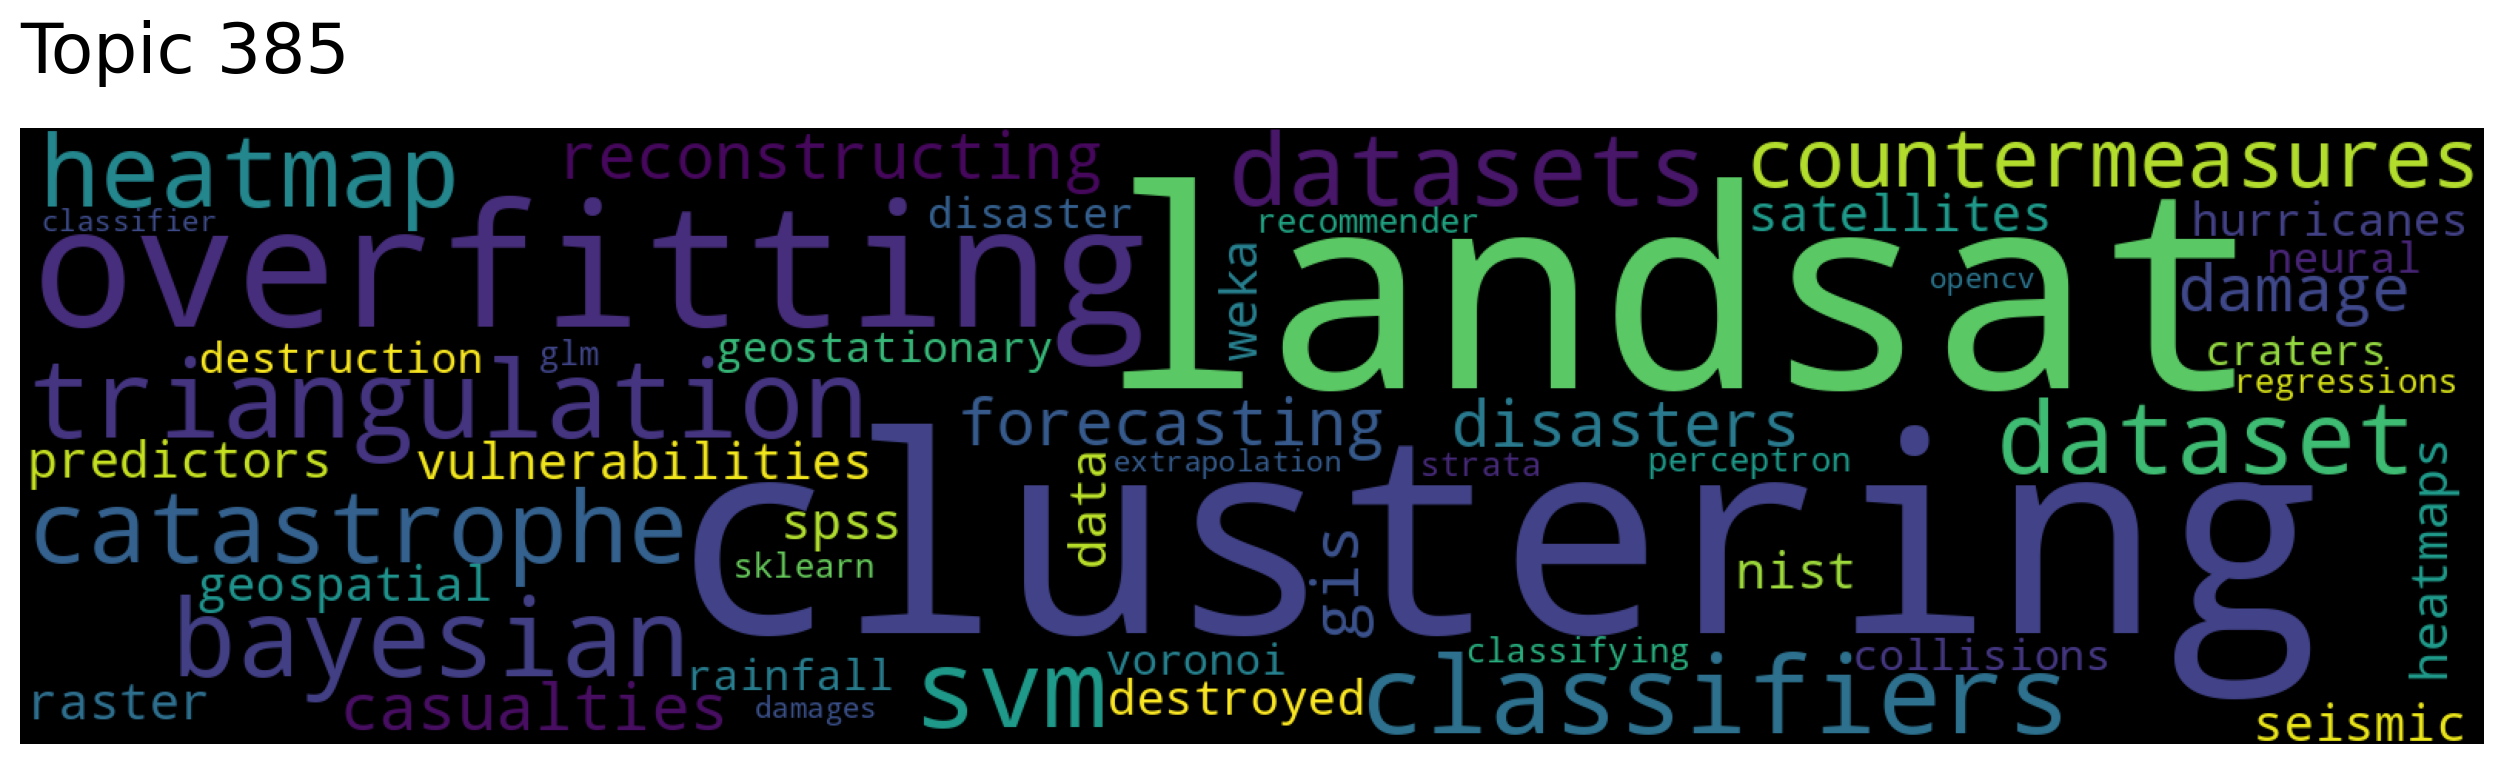

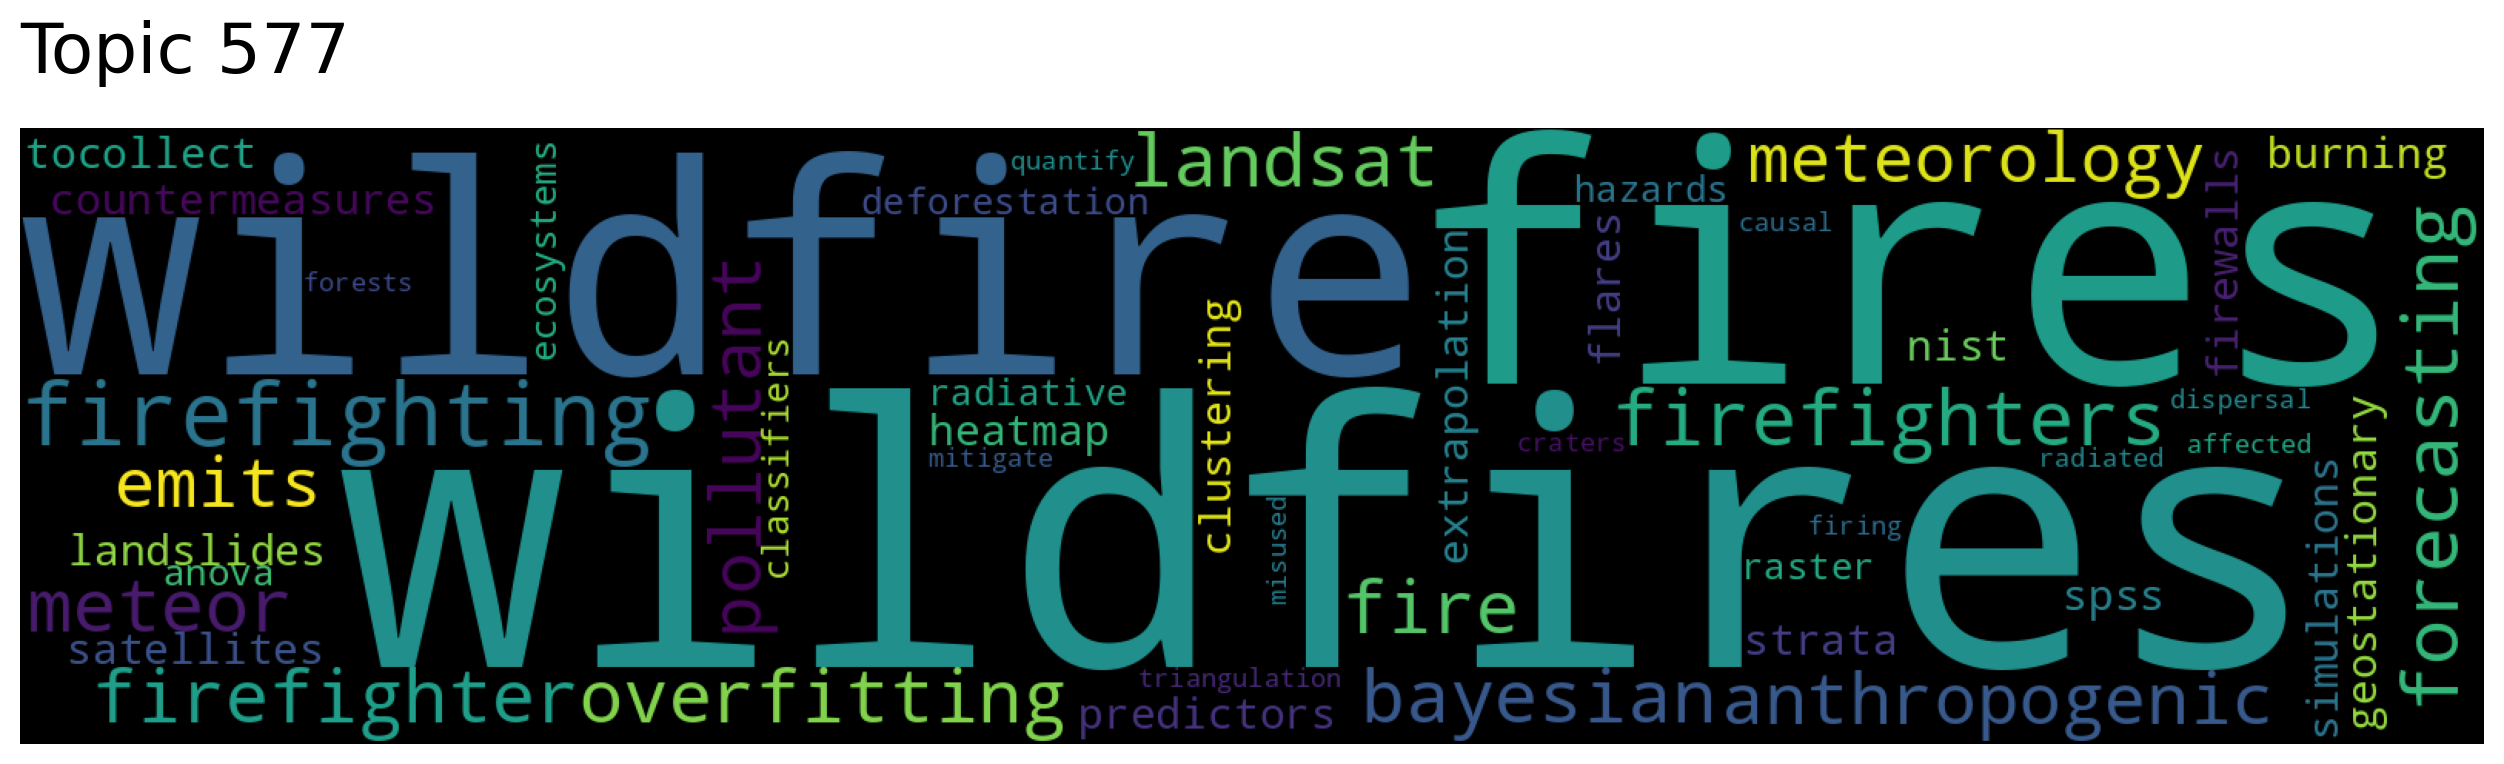

In [ ]:
#@title wordcloud
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["emissions","disasters", "monitoring","emergency"], num_topics=2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
#@title Поиск документов по указанному топику

print("Поиск документов по топику")
print("=" * 30)

# Выполнение поиска документов по указанному топику
# В данном случае ищем 5 документов, связанных с топиком номер 1
topic_number = 100
number_of_documents = 3
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=topic_number, num_docs=number_of_documents)

# Печать результатов поиска
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"ID документа: {doc_id}, Схожесть: {score:.3f}")
    print("-" * 30)
    print(doc)
    print("-" * 30)
    print()

# Описание переменных:
# documents: список документов, упорядоченный от наиболее до наименее схожего с топиком.
# document_scores: оценки семантической схожести документов с топиком, измеряемые как косинусное сходство между векторами документа и топика.
# document_ids: уникальные идентификаторы документов. Если идентификаторы не были заданы, то используется индекс документа в исходном корпусе.


Поиск документов по топику
ID документа: 252742, Схожесть: 0.880
------------------------------
due to the advantages of flexible deployment and extensive coverage, unmannedaerial vehicles (uavs) have great potential for sensing applications in thenext generation of cellular networks, which will give rise to a cellularinternet of uavs. in this paper, we consider a cellular internet of uavs, wherethe uavs execute sensing tasks through cooperative sensing and transmission tominimize the age of information (aoi). however, the cooperative sensing andtransmission is tightly coupled with the uavs' trajectories, which makes thetrajectory design challenging. to tackle this challenge, we propose adistributed sense-and-send protocol, where the uavs determine the trajectoriesby selecting from a discrete set of tasks and a continuous set of locations forsensing and transmission. based on this protocol, we formulate the trajectorydesign problem for aoi minimization and propose a compound-action act

In [ ]:
#@title Поиск по всем документам
# Поиск документов по ключевым словам 'cryptography' и 'privacy'
print("Поиск документов по ключевым словам 'cryptography' и 'privacy'")
print("=" * 50)

# Ключевые слова и количество документов для поиска

keywords = ["uav", "ecology","radars"]
num_docs_to_search = 5

# Выполнение поиска
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=keywords, num_docs=num_docs_to_search)

# Вывод результатов поиска
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"ID документа: {doc_id}, Схожесть: {score:.3f}")
    print("-" * 30)
    print(doc)
    print("-" * 30)
    print()


In [ ]:
df.iloc[240208]

In [ ]:
#@title Поиск схожих слов
# Список стартовых ключевых слов для исследования
initial_keywords = ["disasters", "airquality","hydrology","ecology", "monitoring", "radars", "environment"]

# Количество слов для поиска для каждого ключевого слова
num_similar_words = 20

# Итерация по списку стартовых ключевых слов
for keyword in initial_keywords:
    print(f"Поиск слов, похожих на '{keyword}'")
    print("=" * 30)

    # Выполнение поиска похожих слов
    words, word_scores = model.similar_words(keywords=[keyword], keywords_neg=[], num_words=num_similar_words)

    # Вывод только первых 5 найденных слов и их схожести
    for word, score in zip(words[:5], word_scores[:5]):  # Ограничение вывода первыми 5 словами
        print(f"Слово: {word}, Схожесть: {score:.3f}")
    print()


###  Plots

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go

# Предполагаем, что 'df' уже содержит нужные данные
df['created'] = pd.to_datetime(df['created'])

# Словарь групп топиков
topics_groups = {
    'Disasters & Emergency': [385, 591, 462, 346, 173, 226, 430, 369],
    'Pollution & Emissions': [448, 190, 642],
    'Water Pollution': [355, 629],
    'Urban Recycling': [454, 679, 161, 201, 479, 595, 562, 508, 262, 155],
    'Infrared & Thermal': [338, 291, 91, 172, 580, 611, 625, 88, 264, 620, 342, 457]
}

uav_topic = [0]
# [285, 100, 176, 489, 452, 287, 595, 116, 371, 347, 603, 629, 497, 286, 577, 485]
# Функция для назначения тематической группы
def assign_topic_group(topic_num):
    for group_name, topics in topics_groups.items():
        if topic_num in topics:
            return group_name
    return None

# Применяем функцию к DataFrame
df['topic_group'] = df['topic_num'].apply(assign_topic_group)

# Фильтруем данные для периода с 2010 по 2024 год
df_filtered = df[(df['created'] >= '2010-01-01') & (df['created'] <= '2023-12-31')]

# Группировка по месяцу и году создания и тематической группе
df_grouped = df_filtered.groupby([df_filtered['created'].dt.to_period("M"), 'topic_group']).size().reset_index(name='counts')
df_grouped['created'] = df_grouped['created'].dt.to_timestamp()

# Для удобства, добавляем колонку с количеством месяцев с начала 2010 года
df_grouped['months_since_start'] = (df_grouped['created'].dt.year - 2010) * 12 + df_grouped['created'].dt.month - 1


In [ ]:
#@title uav topics
df_uav_filtered = df_filtered[df_filtered['topic_num'].isin(uav_topic)]
total_counts_by_topic = df_uav_filtered.groupby('topic_num').size().to_dict()
df_uav_filtered['topic_with_num'] = df_uav_filtered['topic_num'].astype(str) + ' - ' + df_uav_filtered['topic_representation']
df_uav_filtered['total_counts'] = df_uav_filtered['topic_num'].map(total_counts_by_topic)

df_grouped_uav = df_uav_filtered.groupby([df_uav_filtered['created'].dt.to_period("M"), 'topic_with_num']).size().reset_index(name='counts')
df_grouped_uav['created'] = df_grouped_uav['created'].dt.to_timestamp()

fig_uav = px.line(df_grouped_uav, x='created', y='counts', color='topic_with_num',
                  title='Развитие выбранных тематических групп во времени',
                  labels={'created': 'Дата', 'counts': 'Количество публикаций', 'topic_with_num': 'Тематика'})
fig_uav.update_layout(xaxis_title='Дата', yaxis_title='Количество публикаций', legend_title='Тематика', width=1200, height=600)
fig_uav.show()


<ipython-input-10-93320b84a4f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uav_filtered['topic_with_num'] = df_uav_filtered['topic_num'].astype(str) + ' - ' + df_uav_filtered['topic_representation']
<ipython-input-10-93320b84a4f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uav_filtered['total_counts'] = df_uav_filtered['topic_num'].map(total_counts_by_topic)


Количество публикаций по топику 2 с 2022-01-01 по 2023-01-01: 1724


In [ ]:
#@title Плот по 5 группам
fig = px.line(df_grouped, x='created', y='counts', color='topic_group',
              title='Развитие тематических групп во времени',
              labels={'created': 'Дата', 'counts': 'Количество публикаций', 'topic_group': 'Тематическая группа'})

fig.update_layout(xaxis_title='Дата', yaxis_title='Количество публикаций', legend_title='Тематическая группа', width=1200, height=600)

fig.show()


In [ ]:
# Группируем данные по годам и подсчитываем общее количество публикаций в каждом году
publications_per_year_total = df.groupby('year').size()

# Вычисляем среднее количество публикаций в год
average_publications_per_year = publications_per_year_total.mean()

# Вычисляем медиану количества публикаций в год
median_publications_per_year = publications_per_year_total.median()

print(f"Среднее количество публикаций в год: {average_publications_per_year}")
print(f"Медиана количества публикаций в год: {median_publications_per_year}")


Среднее количество публикаций в год: 17921.387096774193
Медиана количества публикаций в год: 760.0


In [ ]:
# Группируем данные по годам и топикам, подсчитываем количество публикаций для каждого топика в каждом году
publications_per_year_topic = df.groupby(['year', 'topic_num']).size().reset_index(name='counts')

# Вычисляем среднее количество публикаций в год для каждого топика
average_publications_per_topic = publications_per_year_topic.groupby('topic_num')['counts'].mean()

# Находим топики, чье среднее количество публикаций в год превышает общее среднее
topics_above_average = average_publications_per_topic[average_publications_per_topic > average_publications_per_year]

print("Топики с средним количеством публикаций в год выше общего среднего:")
print(topics_above_average)


Топики с средним количеством публикаций в год выше общего среднего:
Series([], Name: counts, dtype: float64)


In [ ]:
# Выбираем данные только для топика 0
df_topic_0 = df[df['topic_num'] == 10]

# Группируем данные топика 0 по годам и подсчитываем количество публикаций
publications_per_year_topic_0 = df_topic_0.groupby('year').size()

# Вычисляем среднее и медиану количества публикаций в год для топика 0
average_publications_topic_0 = publications_per_year_topic_0.mean()
median_publications_topic_0 = publications_per_year_topic_0.median()

print(f"Топик 0 — среднее количество публикаций в год: {average_publications_topic_0}")
print(f"Топик 0 — медиана количества публикаций в год: {median_publications_topic_0}")


Топик 0 — среднее количество публикаций в год: 230.6086956521739
Топик 0 — медиана количества публикаций в год: 274.0


In [ ]:
# Группировка данных по годам и топикам, подсчет количества публикаций для каждого топика в каждом году
publications_per_year_topic = df.groupby(['year', 'topic_num']).size().reset_index(name='counts')

# Группировка данных по годам, подсчет медианы количества публикаций в каждом году
median_publications_per_year = df.groupby('year').size().median()

print(f"Медиана количества публикаций в год по всем топикам: {median_publications_per_year}")

# Вычисление медианы количества публикаций в год для каждого топика
publications_per_year_topic['median_counts'] = publications_per_year_topic.groupby('topic_num')['counts'].transform('median')

# Выбор топиков, чья медиана количества публикаций выше общей медианы
topics_above_median = publications_per_year_topic[publications_per_year_topic['median_counts'] > median_publications_per_year]

# Отображение топиков, превышающих медиану
unique_topics_above_median = topics_above_median['topic_num'].unique()
print(f"Уникальные топики с медианой публикаций выше общей медианы: {unique_topics_above_median}")


Медиана количества публикаций в год по всем топикам: 760.0
Уникальные топики с медианой публикаций выше общей медианы: []


In [ ]:
# Вычисляем абсолютное отклонение от медианы для каждого топика
publications_per_year_topic['deviation_from_median'] = abs(publications_per_year_topic['median_counts'] - median_publications_per_year)

# Сортируем топики по абсолютному отклонению от медианы
closest_to_median = publications_per_year_topic.sort_values(by='deviation_from_median', ascending=True).drop_duplicates('topic_num')

# Выводим топ-5 топиков, наиболее близких к медиане
print("Топ-5 топиков, наиболее близких к медиане общего количества публикаций:")
print(closest_to_median.head(5)[['topic_num', 'median_counts']])


Топ-5 топиков, наиболее близких к медиане общего количества публикаций:
      topic_num  median_counts
9969          3          362.5
5842          0          335.0
575          10          274.0
361           4          261.0
6545         18          213.5


In [ ]:
# Предполагаем, что df_filtered - это ваш DataFrame, и он уже загружен
import pandas as pd

# Убедимся, что дата в правильном формате
df_filtered['created'] = pd.to_datetime(df_filtered['created'])

# Фильтруем по дате и номеру топика
# Замените '0' на номер интересующего вас топика
start_date = '2022-01-01'
end_date = '2023-01-01'
topic_num = 2

filtered_df = df_filtered[(df_filtered['created'] >= start_date) &
                          (df_filtered['created'] <= end_date) &
                          (df_filtered['topic_num'] == topic_num)]

# Подсчет количества публикаций
publications_count = len(filtered_df)

# Вывод результата
print(f"Количество публикаций по топику {topic_num} с {start_date} по {end_date}: {publications_count}")

Количество публикаций по топику 2 с 2022-01-01 по 2023-01-01: 1724


In [ ]:
import pandas as pd

# Предполагается, что df_filtered уже содержит необходимые данные
# Преобразуем столбец 'created' в формат datetime, если это еще не сделано
df_filtered['created'] = pd.to_datetime(df_filtered['created'])

# Фильтруем данные, чтобы оставить только записи с 2010-01-01 по 2023-12-31
start_date = '2010-01-01'
end_date = '2023-12-31'
df_filtered = df_filtered[(df_filtered['created'] >= start_date) & (df_filtered['created'] <= end_date)]

# Теперь, когда данные отфильтрованы, мы можем извлечь год для последующей группировки
df_filtered['year'] = df_filtered['created'].dt.year

# Подсчет количества публикаций по темам за каждый год
publications_per_topic_year = df_filtered.groupby(['topic_num', 'year']).size().unstack(fill_value=0)

# Вычисление изменения количества публикаций по годам для каждой темы
growth_per_topic = publications_per_topic_year.diff(axis=1)

# Суммирование изменений для оценки общего роста / спада интереса по темам за весь период
total_growth_per_topic = growth_per_topic.sum(axis=1)

# Темы с наибольшим ростом интереса
top_growing_topics = total_growth_per_topic.nlargest(5)
print("Топ-5 тем с наибольшим ростом интереса:")
print(top_growing_topics)

# Темы с наибольшим сокращением интереса
top_declining_topics = total_growth_per_topic.nsmallest(5)
print("\nТоп-5 тем с наибольшим сокращением интереса:")
print(top_declining_topics)


Топ-5 тем с наибольшим ростом интереса:
topic_num
59     2.0
251    1.0
327    1.0
506    1.0
514    1.0
dtype: float64

Топ-5 тем с наибольшим сокращением интереса:
topic_num
4    -230.0
12   -182.0
3    -167.0
0    -159.0
18   -150.0
dtype: float64


<ipython-input-217-bc46a4f57de0>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Подсчет общего количества публикаций по годам
total_publications_per_year = df_filtered.groupby('year').size()

# Расчет среднего количества публикаций в год
average_publications_per_year = total_publications_per_year.mean()

print("Среднее количество публикаций в год для всех статей:", average_publications_per_year)


Среднее количество публикаций в год для всех статей: 39381.57142857143


In [ ]:
# Подсчет количества публикаций по темам и годам
publications_per_topic_year = df_filtered.groupby(['topic_num', 'year']).size().unstack(fill_value=0)

# Расчет среднего количества публикаций в год для каждой темы
average_publications_per_topic_per_year = publications_per_topic_year.mean(axis=1)

# Выбор топ 5 тем по среднему количеству публикаций в год
top_5_topics_by_average_publications = average_publications_per_topic_per_year.nlargest(100)

print("Топ 5 тем по среднему количеству публикаций в год:")
print(top_5_topics_by_average_publications)


Топ 5 тем по среднему количеству публикаций в год:
topic_num
0     2914.714286
1      676.785714
2      660.071429
3      640.357143
4      528.285714
         ...     
97      95.357143
98      94.714286
95      93.000000
93      92.785714
99      92.785714
Length: 100, dtype: float64


In [ ]:
import pandas as pd

# Предполагается, что df_filtered уже содержит необходимые данные
# Подсчет количества публикаций по темам за каждый год
# Преобразование столбца created в формат datetime
df_filtered['created'] = pd.to_datetime(df_filtered['created'])

# Извлечение года из столбца created
df_filtered['year'] = df_filtered['created'].dt.year

# Повторение вышеописанных шагов с обновленным столбцом 'year'
publications_per_topic_year = df_filtered.groupby(['topic_num', 'year']).size().unstack(fill_value=0)
growth_per_topic = publications_per_topic_year.diff(axis=1)
total_growth_per_topic = growth_per_topic.sum(axis=1)
top_growing_topics = total_growth_per_topic.nlargest(5)
top_declining_topics = total_growth_per_topic.nsmallest(5)

print("Топ-5 тем с наибольшим ростом интереса:")
print(top_growing_topics)
print("\nТоп-5 тем с наибольшим сокращением интереса:")
print(top_declining_topics)



Топ-5 тем с наибольшим ростом интереса:
topic_num
0     7458.0
2     2136.0
1     1750.0
5     1515.0
14    1251.0
dtype: float64

Топ-5 тем с наибольшим сокращением интереса:
topic_num
140   -49.0
93    -42.0
477   -21.0
203   -18.0
590   -14.0
dtype: float64


<ipython-input-22-22d2d593349d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-22d2d593349d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print(growth_per_topic.loc[0])


year
2010       NaN
2011      62.0
2012     216.0
2013     119.0
2014      77.0
2015     332.0
2016     410.0
2017     553.0
2018    1329.0
2019    1312.0
2020    1398.0
2021     312.0
2022     480.0
2023     858.0
Name: 0, dtype: float64


In [ ]:
print(publications_per_topic_year.loc[0])




year
2010     165
2011     227
2012     443
2013     562
2014     639
2015     971
2016    1381
2017    1934
2018    3263
2019    4575
2020    5973
2021    6285
2022    6765
2023    7623
Name: 0, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Данные по теме 140
data = {
    'Год': range(2010, 2024),
    'Публикации': [74, 111, 105, 102, 95, 95, 83, 72, 47, 40, 37, 38, 22, 25],
    'Изменение': [None, 37.0, -6.0, -3.0, -7.0, 0.0, -12.0, -11.0, -25.0, -7.0, -3.0, 1.0, -16.0, 3.0]
}

df2 = pd.DataFrame(data)

print(df2)


     Год  Публикации  Изменение
0   2010          74        NaN
1   2011         111       37.0
2   2012         105       -6.0
3   2013         102       -3.0
4   2014          95       -7.0
5   2015          95        0.0
6   2016          83      -12.0
7   2017          72      -11.0
8   2018          47      -25.0
9   2019          40       -7.0
10  2020          37       -3.0
11  2021          38        1.0
12  2022          22      -16.0
13  2023          25        3.0


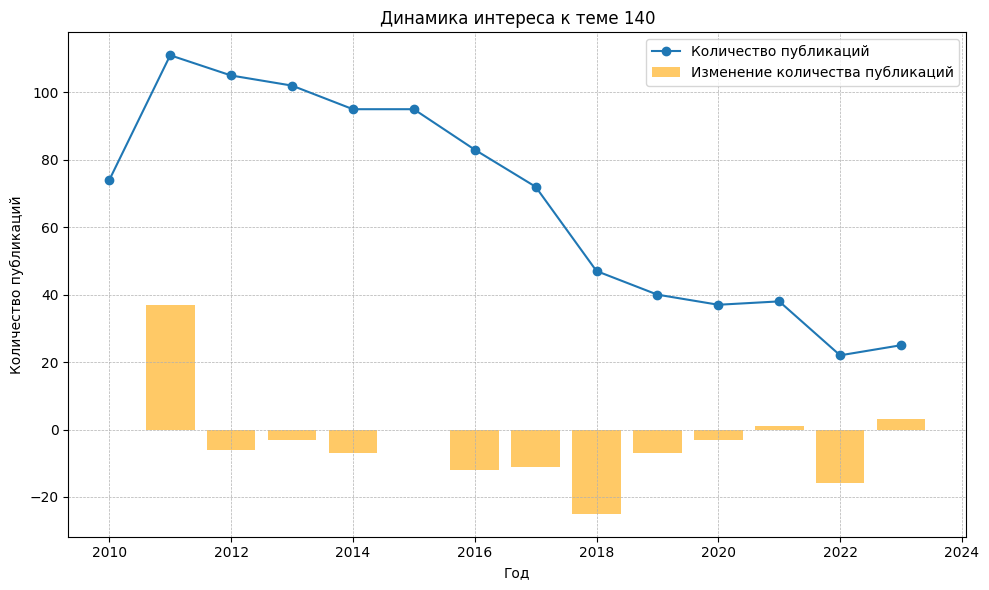

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# График количества публикаций
plt.plot(df2['Год'], df2['Публикации'], label='Количество публикаций', marker='o')

# График изменения количества публикаций
plt.bar(df2['Год'], df2['Изменение'], alpha=0.6, label='Изменение количества публикаций', color='orange')

plt.title('Динамика интереса к теме 140')
plt.xlabel('Год')
plt.ylabel('Количество публикаций')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Показать график
plt.show()


In [ ]:
import plotly.graph_objects as go

def visualize_topic_trend_plotly(topic_num):
    # Извлечение данных для конкретной темы
    publications = publications_per_topic_year.loc[topic_num]
    changes = growth_per_topic.loc[topic_num]

    years = publications.index

    # Создание графика количества публикаций
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=years, y=publications, mode='lines+markers', name='Количество публикаций'))

    # Создание графика изменения количества публикаций
    fig.add_trace(go.Bar(x=years, y=changes, name='Изменение количества публикаций', marker_color='orange'))

    # Настройка макета
    fig.update_layout(title=f'Динамика интереса к топику {topic_num}',
                      xaxis_title='Год',
                      yaxis_title='Количество публикаций',
                      legend=dict(y=0.5, traceorder='reversed', font_size=16),
                      barmode='overlay')

    # Показать график
    fig.show()



# Визуализация для тем с наибольшим ростом
for topic in top_growing_topics:
    visualize_topic_trend_plotly(topic)

# Визуализация для тем с наибольшим сокращением
for topic in top_declining_topics:
    visualize_topic_trend_plotly(topic)



In [ ]:
visualize_topic_trend_plotly(0)


In [ ]:
import pandas as pd

# Предполагаем, что df - это ваш датафрейм

# Топики с наибольшим ростом и с наибольшим сокращением интереса
topics_growth = [0, 2, 1, 5, 14]
topics_decline = [140, 93, 477, 203, 590]

# Группировка по topic_num и выбор первого значения topic_representation для каждой группы
unique_keywords_growth = df[df['topic_num'].isin(topics_growth)].groupby('topic_num')['topic_representation'].first().reset_index()

unique_keywords_decline = df[df['topic_num'].isin(topics_decline)].groupby('topic_num')['topic_representation'].first().reset_index()

# Вывод результатов
print("Уникальные ключевые слова для топиков с наибольшим ростом интереса:")
print(unique_keywords_growth)

print("\nУникальные ключевые слова для топиков с наибольшим сокращением интереса:")
print(unique_keywords_decline)


Уникальные ключевые слова для топиков с наибольшим ростом интереса:
   topic_num                             topic_representation
0          0   bayesian, svm, overfitting, classifiers, arxiv
1          1    clustering, svm, classifiers, voronoi, opencv
2          2         alphago, automaton, robots, ais, robotic
3          5    classifiers, bayesian, lstm, svm, overfitting
4         14  voronoi, raytracing, photogrammetry, voxel, svm

Уникальные ключевые слова для топиков с наибольшим сокращением интереса:
   topic_num                               topic_representation
0         93  bayesian, arxiv, quantization, convolution, la...
1        140       relay, relays, insuch, relaying, transceiver
2        203   clustering, subnets, cluster, zigbee, kubernetes
3        477  peer, bittorrent, decentralized, bgp, blockchains
4        590              xml, xpath, nosql, rdf, datastructure


In [ ]:
import pandas as pd

# Представим, что df - это ваш датафрейм
# Загрузите ваш датафрейм здесь, если он еще не загружен
# df = pd.read_csv('your_dataset.csv') или любой другой способ загрузки
pd.set_option('display.max_colwidth', 500)
# Фильтруем датафрейм, чтобы получить записи, соответствующие топику 93
topic_93_abstracts = df[df['topic_num'] == 93]['abstract']

# Выводим первые несколько абстрактов для просмотра. Допустим, вы хотите увидеть первые 5.
print(topic_93_abstracts.head(5))


90     this paper concerns the capacity of the discrete noiseless channel introducedby shannon. a sufficient condition is given for the capacity to bewell-defined. for a general discrete noiseless channel allowing non-integervalued symbol weights, it is shown that the capacity--if well-defined--can bedetermined from the radius of convergence of its generating function, from thesmallest positive pole of its generating function, or from the rightmost realsingularity of its complex generating function...
258                                                                                new channel coding converse and achievability bounds are derived for a singleuse of an arbitrary channel. both bounds are expressed using a quantity calledthe "smooth 0-divergence", which is a generalization of renyi's divergence oforder 0. the bounds are also studied in the limit of large block-lengths. inparticular, they combine to give a general capacity formula which is equivalentto the one derived by v

In [ ]:
# Группировка по топикам и вычисление медианы длины абстрактов для каждого топика
median_abstract_length_per_topic = df.groupby('topic_num')['abstract_length'].median()

# Слияние медианных значений длины абстрактов и количества публикаций
analysis_df = pd.merge(median_abstract_length_per_topic, total_publications_per_topic, on='topic_num')

# Анализ корреляции между длиной абстракта и количеством публикаций
correlation = analysis_df['abstract_length'].corr(analysis_df['total_counts'])
print(f"Корреляция между длиной абстракта и количеством публикаций: {correlation}")


Корреляция между длиной абстракта и количеством публикаций: 0.01983337406144378


In [ ]:
# Вычисление медианного количества публикаций по топикам
median_publications = df.groupby('topic_num').size().median()

# Расчет абсолютного отклонения количества публикаций каждого топика от медианы
df['publication_count'] = df.groupby('topic_num')['topic_num'].transform('size')
df['deviation_from_median'] = abs(df['publication_count'] - median_publications)

# Агрегация данных для анализа дисперсии
topic_deviation_summary = df.groupby('topic_num')['deviation_from_median'].mean().reset_index()

# Вывод топиков с наибольшим и наименьшим отклонением
top_deviation = topic_deviation_summary.nlargest(5, 'deviation_from_median')
bottom_deviation = topic_deviation_summary.nsmallest(5, 'deviation_from_median')

print("Топики с наибольшим отклонением от медианы:")
print(top_deviation)
print("\nТопики с наименьшим отклонением от медианы:")
print(bottom_deviation)


Топики с наибольшим отклонением от медианы:
   topic_num  deviation_from_median
0          0                40529.5
1          1                 9116.5
2          2                 8888.5
3          3                 8690.5
4          4                 7185.5

Топики с наименьшим отклонением от медианы:
     topic_num  deviation_from_median
343        343                    1.5
344        344                    1.5
345        345                    1.5
342        342                    5.5
346        346                    6.5


In [ ]:
#@title note linear
# df_filtered['topic_group'] = df_filtered['topic_num'].apply(assign_topic_group)
# # Группировка по тематической группе и году публикации
# df_grouped = df.groupby([df_filtered['created'].dt.year, 'topic_group']).size().reset_index(name='counts')

# fig = go.Figure()

# # Перебор тематических групп
# for group_name in topics_groups.keys():
#     df_group = df_grouped[df_grouped['topic_group'] == group_name]

#     if not df_group.empty:
#         # Преобразование года в числовой формат для оси X
#         X = df_group['created']
#         y = df_group['counts']

#         # Обучение модели
#         model = LinearRegression()
#         model.fit(X.values.reshape(-1, 1), y)

#         # Получение предсказаний для сглаживания
#         X_pred = np.linspace(X.min(), X.max(), len(X.unique())).reshape(-1, 1)
#         y_pred = model.predict(X_pred)

#         # Добавление линии тренда на график
#         fig.add_trace(go.Scatter(x=X_pred.flatten(), y=y_pred, mode='lines', name=group_name))

# fig.update_layout(title='Сглаженные тренды для тематических групп',
#                   xaxis_title='Год',
#                   yaxis_title='Количество публикаций',
#                   legend_title='Тематическая группа',
#                   width=1200, height=600)

# fig.show()


Полиномиальная регрессия — это форма регрессионного анализа, в которой отношение между независимой переменной x и зависимой переменной y моделируется как полином n-й степени в x. Полиномиальная регрессия используется, когда данные показывают, что отношение между x и y более сложное, чем может быть выражено линейной моделью. В Scikit-learn это реализуется с помощью комбинации PolynomialFeatures и LinearRegression.

Как работает PolynomialFeatures
PolynomialFeatures преобразует ваш исходный набор данных, добавляя новые признаки, которые представляют собой полиномиальные комбинации исходных признаков. Например, если ваш исходный набор данных имеет один признак x, и вы используете PolynomialFeatures с degree=2, то он создаст два новых признака: x^2 и x (и также добавит признак-константу для свободного члена, если include_bias=True).

Параметры PolynomialFeatures
degree: Максимальная степень полинома. Например, если degree=2, то будут созданы признаки для x, x^2.
interaction_only: Если True, создаются только признаки, представляющие собой произведение пар признаков, т.е., без степеней и комбинаций более чем двух признаков.
include_bias: Если True (по умолчанию), то добавляется признак-константа (свободный член полинома).
Когда стоит менять параметры
Изменение степени (degree): Увеличение степени позволяет модели лучше подстраиваться под данные, но также увеличивает риск переобучения, когда модель слишком точно подгоняется под тренировочные данные и теряет способность обобщать. Выбор оптимальной степени обычно требует экспериментов и валидации модели на отдельном тестовом наборе данных или использования кросс-валидации.

Использование только взаимодействий (interaction_only): Этот параметр может быть полезен, когда вы предполагаете, что важные признаки скрыты в произведениях признаков, но не хотите усложнять модель добавлением степеней признаков. Это может помочь снизить риск переобучения при сохранении возможности модели захватывать важные взаимосвязи между признаками.

Добавление или исключение свободного члена (include_bias): В большинстве случаев свободный член необходим, но если данные уже центрированы или по другим причинам добавление константного признака нецелесообразно, его можно исключить.

Вывод
Изменение параметров PolynomialFeatures может значительно влиять на производительность вашей модели. Выбор правильной конфигурации зависит от конкретной задачи, распределения данных и желаемого баланса между точностью модели и её способностью к обобщению. Эксперименты и валидация модели на отдельном наборе данных или с использованием кросс-валидации помогут определить оптимальные парамет

In [ ]:
#@title Полиномиальная регрессия 1
from sklearn.preprocessing import PolynomialFeatures
start_year = 2010
df_grouped = df_grouped[df_grouped['topic_group'] == 'Infrared & Thermal']

# Получаем X и y для регрессии
X = df_grouped['months_since_start'].values.reshape(-1, 1)
y = df_grouped['counts']

# Создаем полиномиальные признаки
poly = PolynomialFeatures(degree=3)  # Степень полинома можно изменять
X_poly = poly.fit_transform(X)

# Обучаем модель полиномиальной регрессии
model = LinearRegression()
model.fit(X_poly, y)

# Получаем предсказания для сглаживания
X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_pred_poly = poly.transform(X_pred)
y_pred = model.predict(X_pred_poly)


fig = go.Figure()

# Подготавливаем текст для подсказок
# Конвертируем 'months_since_start' обратно в 'год-месяц' для каждой точки
tooltip_texts = [f"{start_year + int(m / 12)}-{int(m % 12) + 1:02d}" for m in df_grouped['months_since_start']]

# Добавляем реальные данные с кастомными подсказками
fig.add_trace(go.Scatter(x=df_grouped['months_since_start'], y=df_grouped['counts'], mode='markers', name='Реальные данные',
                         text=[f"{date}, Публикаций: {count}" for date, count in zip(tooltip_texts, df_grouped['counts'])],
                         hoverinfo='text'))

# Добавляем линию полиномиального тренда
fig.add_trace(go.Scatter(x=X_pred.flatten(), y=y_pred, mode='lines', name='Полиномиальный тренд'))

# Настройки отображения графика
fig.update_layout(title='Полиномиальная регрессия для группы Infrared & Thermal',
                  xaxis_title='Год',
                  yaxis_title='Количество публикаций',
                  legend_title='Тематическая группа',
                  width=1200, height=600)

# Конвертируем 'months_since_start' обратно в годы для отображения на оси X
ticks_vals = np.arange(X.min(), X.max(), 12)  # Каждые 12 месяцев
ticks_text = [str(start_year + int(months / 12)) for months in ticks_vals]

fig.update_xaxes(tickvals=ticks_vals, ticktext=ticks_text)

# Показываем график
fig.show()



In [ ]:
#@title Полиномиальная регрессия 5
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import numpy as np

# Подготовим цвета для каждой тематической группы
colors = {
    'Disasters & Emergency': 'rgba(255, 99, 132, 1)',  # Красный
    'Pollution & Emissions': 'rgba(54, 162, 235, 1)',  # Синий
    'Water Pollution': 'rgba(255, 206, 86, 1)',  # Желтый
    'Urban Recycling': 'rgba(75, 192, 192, 1)',  # Зеленый
    'Infrared & Thermal': 'rgba(153, 102, 255, 1)'  # Фиолетовый
}

# Инициализируем начальный год
start_year = 2010

fig = go.Figure()

# Конвертируем 'months_since_start' в 'год-месяц' для подсказок
def convert_to_year_month(months_since_start):
    year = start_year + months_since_start // 12
    month = months_since_start % 12 + 1  # +1 потому что отсчет начинается с 0
    return f"{year}-{month:02d}"

# Добавление данных и трендов для каждой группы
for group_name in topics_groups.keys():
    df_filtered_group = df_grouped[df_grouped['topic_group'] == group_name]
    if not df_filtered_group.empty:
        X = df_filtered_group['months_since_start'].values.reshape(-1, 1)
        y = df_filtered_group['counts']
        poly = PolynomialFeatures(degree=3)
        X_poly = poly.fit_transform(X)
        model = LinearRegression()
        model.fit(X_poly, y)
        X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        X_pred_poly = poly.transform(X_pred)
        y_pred = model.predict(X_pred_poly)

        tooltips = [f"{convert_to_year_month(m)}, Публикаций: {c}" for m, c in zip(df_filtered_group['months_since_start'], df_filtered_group['counts'])]

        # Определяем цвет для текущей группы
        color = colors.get(group_name, 'rgba(0, 0, 0, 1)')  # Черный по умолчанию

        fig.add_trace(go.Scatter(
            x=df_filtered_group['months_since_start'],
            y=df_filtered_group['counts'],
            mode='markers',
            name=f'Реальные данные {group_name}',
            text=tooltips,
            hoverinfo='text',
            marker=dict(color=color, opacity=0.5)  # Прозрачность точек
        ))

        fig.add_trace(go.Scatter(
            x=X_pred.flatten(),
            y=y_pred,
            mode='lines',
            name=f'Тренд {group_name}',
            line=dict(color=color)  # Цвет линии
        ))

# Настройки отображения графика
fig.update_layout(
    title='Полиномиальная регрессия для всех тематических групп',
    xaxis_title='Год',
    yaxis_title='Количество публикаций',
    legend_title='Тематическая группа',
    width=1200, height=600
)

# Обновление оси X для отображения годов
max_months_since_start = df_grouped['months_since_start'].max()
ticks_vals = np.arange(0, max_months_since_start + 1, 12)  # Каждые 12 месяцев
ticks_text = [str(start_year + int(months / 12)) for months in ticks_vals]
fig.update_xaxes(tickvals=ticks_vals, ticktext=ticks_text)

# Показываем график
fig.show()



In [ ]:
# Предполагаем, что 'df' - это ваш датафрейм, и 'created' - это столбец с датами публикаций
df['year'] = df['created'].dt.year
total_publications_per_year = df.groupby('year').size()

yearly_change = total_publications_per_year.diff().dropna()
average_yearly_change = yearly_change.mean()
print(f"Среднее годовое изменение количества публикаций: {average_yearly_change}")

# Инициализация словаря для хранения среднего изменения по каждому топику
topic_yearly_change = {}

# Перебираем уникальные топики
for topic_num in df['topic_num'].unique():
    # Фильтруем датафрейм по текущему топику
    topic_df = df[df['topic_num'] == topic_num]

    # Подсчет публикаций по годам для текущего топика
    publications_per_year = topic_df.groupby('year').size()

    # Вычисление изменения количества публикаций по годам и его среднего значения
    change = publications_per_year.diff().dropna()
    topic_yearly_change[topic_num] = change.mean()

# Определение топиков, среднее изменение по которым превышает общее среднее
topics_above_average = {topic: change for topic, change in topic_yearly_change.items() if change > average_yearly_change}

print("Топики с средним годовым изменением выше общего среднего:")
for topic, change in topics_above_average.items():
    print(f"Топик №{topic} - Среднее годовое изменение: {change}")


Среднее годовое изменение количества публикаций: 3175.9333333333334
Топики с средним годовым изменением выше общего среднего:


In [ ]:
# Словарь с тематическими группами и номерами топиков
topics_groups = {
    'Disasters & Emergency': [385, 591, 462, 346, 173, 226, 430, 369],
    'Pollution & Emissions': [448, 190, 642],
    'Water Pollution': [355, 629],
    'Urban Recycling': [454, 679, 161, 201, 479, 595, 562, 508, 262, 155],
    'Infrared & Thermal': [338, 291, 91, 172, 580, 611, 625, 88, 264, 620, 342, 457]
}

# Создание полного списка всех топиков
all_topics = [topic for topics in topics_groups.values() for topic in topics]

# Фильтрация df_filtered для включения только топиков из all_topics
df_relevant = df_filtered[df_filtered['topic_num'].isin(all_topics)]

# Подсчет общего количества публикаций для каждой тематической группы
group_counts = {group: df_relevant[df_relevant['topic_num'].isin(topics)]['topic_num'].count()
                for group, topics in topics_groups.items()}

# Вывод общего количества публикаций для каждой тематической группы
for group, count in group_counts.items():
    print(f"Тематическая группа '{group}' - Общее количество публикаций: {count}")

# Подсчет общего количества публикаций для всех топиков
total_posts = df_relevant['topic_num'].count()

# Вывод общего количества публикаций для всех топиков
print(f"Общее количество публикаций для всех тематических групп: {total_posts}")


Тематическая группа 'Disasters & Emergency' - Общее количество публикаций: 2968
Тематическая группа 'Pollution & Emissions' - Общее количество публикаций: 1026
Тематическая группа 'Water Pollution' - Общее количество публикаций: 435
Тематическая группа 'Urban Recycling' - Общее количество публикаций: 3891
Тематическая группа 'Infrared & Thermal' - Общее количество публикаций: 5951
Общее количество публикаций для всех тематических групп: 14271


In [ ]:
# # Указываем номера интересующих топиков
# topics_to_check = [448, 190, 642]

# # Фильтруем df_relevant для включения только записей с данными топиками
# df_specific_topics = df_relevant[df_relevant['topic_num'].isin(topics_to_check)]

# # Подсчитываем количество записей для каждого топика
# counts_by_specific_topic = df_specific_topics['topic_num'].value_counts()

# # Выводим количество записей для каждого топика
# for topic_num in topics_to_check:
#     count = counts_by_specific_topic.get(topic_num, 0)
#     print(f"Топик №{topic_num} - Общее количество публикаций: {count}")


Топик №448 - Общее количество публикаций: 226
Топик №190 - Общее количество публикаций: 727
Топик №642 - Общее количество публикаций: 73


In [ ]:
#@title intersecting topics
import pandas as pd
import plotly.express as px

# Пересекающиеся топики.
intersecting_topics = [402, 661, 285, 286, 549, 678, 176, 178, 444, 572, 577, 452, 453, 455, 603, 100, 485, 358, 489, 497, 371, 120]

# Убедимся, что 'created' в правильном формате
df['created'] = pd.to_datetime(df['created'])

# Фильтрация по дате и топикам
df_intersecting = df[(df['created'] >= '2010-01-01') & (df['created'] <= '2023-12-31') & (df['topic_num'].isin(intersecting_topics))]

# Подсчет общего количества публикаций для группы пересекающихся топиков по месяцам
df_grouped = df_intersecting.groupby(df_intersecting['created'].dt.to_period("M")).size().reset_index(name='counts')
df_grouped['created'] = df_grouped['created'].dt.to_timestamp()

# Визуализация
fig = px.line(df_grouped, x='created', y='counts',
              title='Развитие группы пересекающихся тематических топиков во времени',
              labels={'created': 'Дата', 'counts': 'Количество публикаций'})

# Настройка внешнего вида графика
fig.update_layout(xaxis_title='Дата', yaxis_title='Количество публикаций', width=1200, height=600)

# Показать график
fig.show()


In [ ]:
# Список пересекающихся топиков
intersecting_topics = [402, 661, 285, 286, 549, 678, 176, 178, 444, 572, 577, 452, 453, 455, 603, 100, 485, 358, 489, 497, 371, 120]

# Фильтруем df_relevant для включения только записей с пересекающимися топиками
df_intersecting_topics = df[df['topic_num'].isin(intersecting_topics)]

# Подсчитываем общее количество записей для пересекающихся топиков
count_intersecting_topics = df_intersecting_topics['topic_num'].count()

# Выводим результат
print(f"Общее количество публикаций для пересекающихся топиков: {count_intersecting_topics}")


Общее количество публикаций для пересекающихся топиков: 7934


In [ ]:
# Подготовка данных для уникальных тематических групп и пересекающихся топиков
unique_topics_groups = {
    'Disasters & Emergency': [385, 591, 462, 346, 173, 226, 430, 369],
    'Pollution & Emissions': [448, 190, 642],
    'Water Pollution': [355, 629],
    'Urban Recycling': [454, 679, 161, 201, 479, 595, 562, 508, 262, 155],
    'Infrared & Thermal': [338, 291, 91, 172, 580, 611, 625, 88, 264, 620, 342, 457]
}

# Фильтрация и агрегация данных по каждой группе
df_grouped_all = pd.DataFrame()

for group_name, topics in unique_topics_groups.items():
    df_temp = df[(df['created'] >= '2010-01-01') & (df['created'] <= '2023-12-31') & (df['topic_num'].isin(topics))]
    df_grouped = df_temp.groupby(df_temp['created'].dt.to_period("M")).size().reset_index(name='counts')
    df_grouped['created'] = df_grouped['created'].dt.to_timestamp()
    df_grouped['group'] = group_name  # Добавляем колонку для названия группы
    df_grouped_all = pd.concat([df_grouped_all, df_grouped], ignore_index=True)

# Добавляем данные для пересекающихся топиков
df_intersecting_grouped = df_intersecting.groupby(df_intersecting['created'].dt.to_period("M")).size().reset_index(name='counts')
df_intersecting_grouped['created'] = df_intersecting_grouped['created'].dt.to_timestamp()
df_intersecting_grouped['group'] = 'Intersecting Topics'  # Маркируем как пересекающиеся топики

# Объединяем все данные в один DataFrame
df_grouped_all = pd.concat([df_grouped_all, df_intersecting_grouped], ignore_index=True)

# Визуализация
fig = px.line(df_grouped_all, x='created', y='counts', color='group',
              title='Сравнение активности публикаций по тематическим группам во времени',
              labels={'created': 'Дата', 'counts': 'Количество публикаций', 'group': 'Тематическая группа'})

# Настройка внешнего вида графика
fig.update_layout(xaxis_title='Дата', yaxis_title='Количество публикаций', legend_title='Тематическая группа', width=1200, height=600)

# Показать график
fig.show()


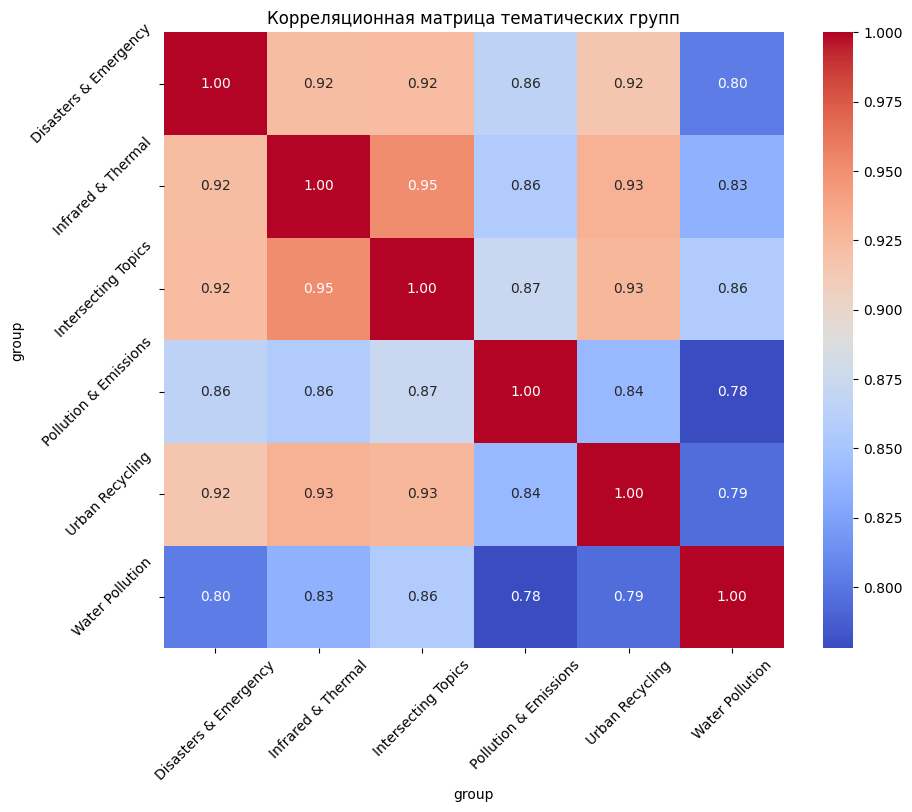

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что 'pivot_table' - это уже созданная сводная таблица
correlation_matrix = pivot_table.corr()

# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Отображение тепловой карты
plt.title('Корреляционная матрица тематических групп')
plt.xticks(rotation=45)  # Поворачиваем названия осей X для лучшей читаемости
plt.yticks(rotation=45)  # Поворачиваем названия осей Y для лучшей читаемости
plt.show()


Коэффициент корреляции 0.92 между "Infrared & Thermal" и "Disasters & Emergency", это указывает на очень сильную положительную линейную взаимосвязь между активностью публикаций в этих двух тематических группах. То есть, когда количество публикаций в тематической группе "Infrared & Thermal" увеличивается, количество публикаций в тематической группе "Disasters & Emergency" также, как правило, увеличивается и наоборот.



In [ ]:
df

,title,id,abstract,categories,doi,created,updated,authors,url,abstract_length,id_n,topic_num,topic_representation,topic_group
0,on-line viterbi algorithm and its relationship...,0704.0062,"in this paper, we introduce the on-line viterb...",cs.ds,10.1007/978-3-540-74126-8_23,2007-03-31,NaT,"['šrámek', 'brejová', 'vinař']",https://arxiv.org/abs/0704.0062,711,0,419,"genome, parallelization, algorithmic, sequenci...",None
1,capacity of a multiple-antenna fading channel ...,0704.0217,given a multiple-input multiple-output (mimo) ...,cs.it math.it,10.1109/tit.2008.2011437,2007-04-02,2009-02-16,"['santipach', 'honig']",https://arxiv.org/abs/0704.0217,1641,1,28,"bayesian, laplacian, autocorrelation, bayes, p...",None
2,refuting the pseudo attack on the reesse1+ cry...,0704.0492,we illustrate through example 1 and 2 that the...,cs.cr,nan,2007-04-04,2010-02-04,"['su', 'lu']",https://arxiv.org/abs/0704.0492,1345,2,12,"lemma, arxiv, theorem, dirichlet, theorems",None
3,optimal routing for decode-and-forward based c...,0704.0499,we investigate cooperative wireless relay netw...,cs.it math.it,10.1109/sahcn.2007.4292845,2007-04-04,NaT,"['ong', 'motani']",https://arxiv.org/abs/0704.0499,1164,3,73,"nodes, blockchains, lattices, algorithmic, node",None
4,on the kolmogorov-chaitin complexity for short...,0704.1043,a drawback of kolmogorov-chaitin complexity (k...,cs.cc cs.it math.it,nan,2007-04-08,2010-12-16,"['delahaye', 'zenil']",https://arxiv.org/abs/0704.1043,861,4,65,"lemma, computable, undecidable, monads, algori...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555558,on the power of random bases in fourier sampli...,quant-ph/0503114,the hidden subgroup problem (hsp) provides a u...,quant-ph cs.et,nan,2005-03-11,NaT,"['radhakrishnan', 'roetteler', 'sen']",https://arxiv.org/abs/quant-ph/0503114,1704,555558,223,"automorphism, abelian, isomorphism, subgroups,...",None
555559,on approximately symmetric informationally com...,quant-ph/0503239,we address the problem of constructing positiv...,quant-ph cs.et,10.1063/1.1998831,2005-03-31,NaT,"['klappenecker', 'roetteler', 'shparlinski', '...",https://arxiv.org/abs/quant-ph/0503239,1119,555559,267,"cohomology, homotopy, invariance, arxiv, topol...",None
555560,limitations of quantum coset states for graph ...,quant-ph/0511148,it has been known for some time that graph iso...,quant-ph cs.et,nan,2005-11-15,NaT,"['hallgren', 'roetteler', 'sen']",https://arxiv.org/abs/quant-ph/0511148,1196,555560,60,"quantum, entanglement, quantization, qubits, w...",None
555561,computing local invariants of qubit systems,quant-ph/9712040,we investigate means to describe the non-local...,quant-ph cs.et,10.1103/physreva.58.1833,1997-12-18,1998-05-29,"['grassl', 'roetteler', 'beth']",https://arxiv.org/abs/quant-ph/9712040,788,555561,62,"dirac, wavefunction, hamiltonian, quantization...",None


In [ ]:
# Пример использования statsmodels для одной из групп
from statsmodels.tsa.arima_model import ARIMA

# Допустим, мы работаем с группой 'Disasters & Emergency'
disasters_emergency_series = pivot_table['Disasters & Emergency']

# Фитинг модели ARIMA
model = ARIMA(disasters_emergency_series, order=(1, 1, 1))
model_fit = model.fit(disp=0)

# Прогноз
forecast = model_fit.forecast(steps=12)  # Прогнозируем на 12 месяцев вперед
print(forecast)


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
# Подсчет общего количества публикаций для каждого topic_num
total_counts_by_topic = df_relevant.groupby('topic_num').size()

# Вывод общего количества публикаций для каждого topic_num
for topic_num, count in total_counts_by_topic.iteritems():
    print(f"Топик №{topic_num} - Общее количество публикаций: {count}")
# Calculate the total number of posts for all topics.
total_posts = df_relevant['topic_num'].count()

# Print the total number of posts.
print(f"Total number of posts for all topics: {total_posts}")

Топик №100 - Общее количество публикаций: 1297
Топик №116 - Общее количество публикаций: 1116
Топик №176 - Общее количество публикаций: 794
Топик №285 - Общее количество публикаций: 481
Топик №286 - Общее количество публикаций: 480
Топик №287 - Общее количество публикаций: 480
Топик №347 - Общее количество публикаций: 354
Топик №371 - Общее количество публикаций: 321
Топик №452 - Общее количество публикаций: 216
Топик №485 - Общее количество публикаций: 192
Топик №489 - Общее количество публикаций: 186
Топик №497 - Общее количество публикаций: 183
Топик №577 - Общее количество публикаций: 120
Топик №595 - Общее количество публикаций: 110
Топик №603 - Общее количество публикаций: 107
Топик №629 - Общее количество публикаций: 89
Total number of posts for all topics: 6526


<ipython-input-115-a4dfe81262c3>:5: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [ ]:
# Подсчет общего количества публикаций для каждого topic_num
total_counts_by_topic = df_filtered.groupby('topic_num').size()

# Вывод общего количества публикаций для каждого topic_num
for topic_num, count in total_counts_by_topic.iteritems():
    print(f"Топик №{topic_num} - Общее количество публикаций: {count}")


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Список топиков для анализа
uav_topic = [285, 100, 176, 489, 452, 287, 595, 116, 371, 347, 603, 629, 497, 286, 577, 485]

# Убедимся, что 'created' в правильном формате
df['created'] = pd.to_datetime(df['created'])

# Фильтрация по дате
df_filtered = df[(df['created'] >= '2010-01-01') & (df['created'] <= '2023-12-31')]

# Разделение на две группы
df_uav = df_filtered[df_filtered['topic_num'].isin(uav_topic)]
df_other = df_filtered[~df_filtered['topic_num'].isin(uav_topic)]

# Группировка и подготовка данных для графиков
df_uav_grouped = df_uav.groupby(df_uav['created'].dt.to_period("M")).size().reset_index(name='counts')
df_uav_grouped['created'] = df_uav_grouped['created'].dt.to_timestamp()

df_other_grouped = df_other.groupby(df_other['created'].dt.to_period("M")).size().reset_index(name='counts')
df_other_grouped['created'] = df_other_grouped['created'].dt.to_timestamp()


In [ ]:
# Создание графика
fig = go.Figure()

# Добавление линии для группы Uav
fig.add_trace(go.Scatter(x=df_uav_grouped['created'], y=df_uav_grouped['counts'], mode='lines+markers', name='UAV Topics'))

# Добавление линии для оставшихся топиков
fig.add_trace(go.Scatter(x=df_other_grouped['created'], y=df_other_grouped['counts'], mode='lines+markers', name='Other Topics'))

# Настройка внешнего вида графика
fig.update_layout(title='Сравнение развития тематических групп во времени', xaxis_title='Дата', yaxis_title='Количество публикаций', legend_title='Группа')

# Показать график
fig.show()


In [ ]:
!pip install umap

doc_vecs = model.document_vectors

import umap
docs_reduced = umap.UMAP(n_components=2,
                         n_neighbors=15,
                         metric="cosine",
                         min_dist=.10,
                         random_state=42,
                         verbose=True).fit_transform(doc_vecs)

In [ ]:
x, y = docs_reduced[:,0], docs_reduced[:,1]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.scatter(x, y, s=5, alpha=.75)
plt.axis("off")
plt.show()

In [ ]:
import numpy as np

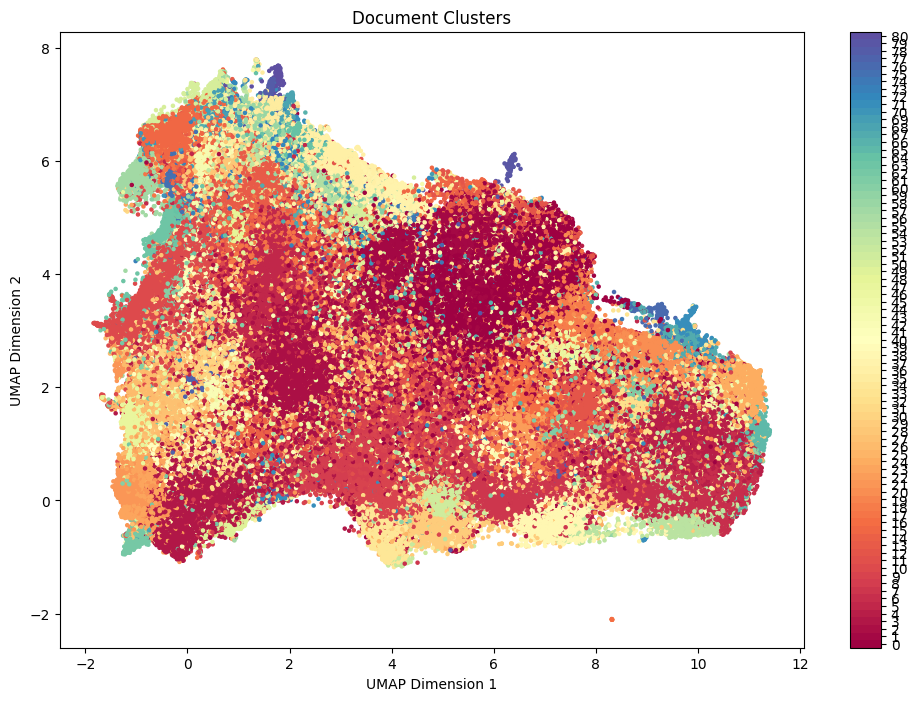

In [ ]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

# # # Assuming your Top2Vec model is named 'model' and it has been trained
# umap_model = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine')
# doc_vectors_2d = umap_model.fit_transform(model.document_vectors)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(docs_reduced[:, 0], docs_reduced[:, 1], c=model.doc_top, cmap='Spectral', s=5)
plt.colorbar(boundaries=np.arange(len(np.unique(model.doc_top))+1)-0.5).set_ticks(np.arange(len(np.unique(model.doc_top))))
plt.title('Document Clusters')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


### Hugging Face

In [ ]:
!cp -r /content/arxiv_cs_from2010to2024-01-01 "/content/drive/MyDrive/AI/top2vec"


In [ ]:
from huggingface_hub import notebook_login

notebook_login()


In [ ]:
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/first_2-parquet-320",
    path_in_repo="first_2-parquet-320",
    repo_id="CCRss/top2vec_science_abstracts",
    repo_type="model",
)

In [ ]:
from huggingface_hub import HfApi
import os

api = HfApi()
folder_path = "/content/my_model_dir"
repo_id = "CCRss/top2vec_science_abstracts"
folder_in_repo = "BERTopic_model/"  # Папка в репозитории

# Пройти по всем файлам в папке и загрузить каждый файл
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        api.upload_file(
            path_or_fileobj=file_path,
            path_in_repo=folder_in_repo + filename,  # Добавление названия папки к пути файла в репозитории
            repo_id=repo_id,
            repo_type="model"
        )

## Main

https://huggingface.co/datasets/CCRss/arXiv_dataset

https://pair-code.github.io/understanding-umap/

https://umap-learn.readthedocs.io/en/latest/scientific_papers.html

In [ ]:
#@title pip
%%capture
!pip install -q transformers
!pip install umap
!pip install umap-learn
!pip install kneed
!pip install tqdm
!pip install adjustText
!pip install dask
!pip install plotly

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

# Определение размера части датасета для загрузки
dataset = load_dataset("CCRss/arXiv_dataset", split="train")

abstracts = dataset["abstract"]
titles = dataset["title"]


Generating train split:   0%|          | 0/2367176 [00:00<?, ? examples/s]

In [ ]:
#@title drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# List of file names
file_list = [
    '/content/drive/MyDrive/AI/Graduation_Project/dataset_vectorizer_pca/vectorized_1_merged.parquet',
    # '/content/drive/MyDrive/AI/Graduation_Project/dataset_vectorizer_pca/vectorized_2_merged.parquet',
    # '/content/drive/MyDrive/AI/Graduation_Project/dataset_vectorizer_pca/vectorized_3_merged.parquet',
    # '/content/drive/MyDrive/AI/Graduation_Project/dataset_vectorizer_pca/vectorized_4_merged.parquet',
    # '/content/drive/MyDrive/AI/Graduation_Project/dataset_vectorizer_pca/vectorized_5_merged.parquet',
    # '/content/drive/MyDrive/AI/Graduation_Project/dataset_vectorizer_pca/vectorized_6_merged.parquet',
    # '/content/drive/MyDrive/AI/Graduation_Project/dataset_vectorizer_pca/vectorized_7_merged.parquet',
    # '/content/drive/MyDrive/AI/Graduation_Project/dataset_vectorizer_pca/vectorized_8_merged.parquet',
]

# Load and concatenate the datasets
df = pd.concat([pd.read_parquet(file_name) for file_name in file_list], ignore_index=True)

In [ ]:
import pandas as pd
df = pd.read_parquet('/content/drive/MyDrive/AI/Graduation_Project/path_to_updated_dataframe.parquet')

In [ ]:
df.head()

,id,title,journal-ref,categories,abstract,versions,update_date,authors_parsed,abstract_vectors,PCA_1,PCA_2
0,0704.0001,Calculation of prompt diphoton production cros...,"Phys.Rev.D76:013009,2007",hep-ph,A fully differential calculation in perturba...,"[{'created': 'Mon, 2 Apr 2007 19:18:42 GMT', '...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...","[-0.10987993, 0.025999043, -0.04958549, 0.0178...",-0.178154,0.037848
1,0704.0002,Sparsity-certifying Graph Decompositions,Unknown,math.CO cs.CG,"We describe a new algorithm, the $(k,\ell)$-...","[{'created': 'Sat, 31 Mar 2007 02:26:18 GMT', ...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]","[-0.03476779, -0.0122230835, -0.039641667, 0.0...",0.215698,-0.064663
2,0704.0003,The evolution of the Earth-Moon system based o...,Unknown,physics.gen-ph,The evolution of Earth-Moon system is descri...,"[{'created': 'Sun, 1 Apr 2007 20:46:54 GMT', '...",2008-01-13,"[[Pan, Hongjun, ]]","[-0.043993864, 0.017934242, -0.04744659, -0.01...",-0.225668,-0.191172
3,0704.0004,A determinant of Stirling cycle numbers counts...,Unknown,math.CO,We show that a determinant of Stirling cycle...,"[{'created': 'Sat, 31 Mar 2007 03:16:14 GMT', ...",2007-05-23,"[[Callan, David, ]]","[-0.08952105, -0.02470199, -0.07303005, -0.019...",0.245084,-0.082874
4,0704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,"Illinois J. Math. 52 (2008) no.2, 681-689",math.CA math.FA,In this paper we show how to compute the $\L...,"[{'created': 'Mon, 2 Apr 2007 18:09:58 GMT', '...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]","[-0.05544742, 0.0013147506, -0.02172975, -0.05...",0.262184,-0.089337


In [ ]:
df.shape

(295897, 11)

In [ ]:
# Двумерный NumPy массив
import numpy as np

# Преобразуем в двумерный массив.
X = np.stack(df['abstract_vectors'].values)


In [ ]:
print(X.shape)

(295897, 384)


In [ ]:
print(X[:5])          # Выводит первые 5 векторов

In [ ]:
import re
from tqdm import tqdm

# class ProgressWriter:
#     def write(self, text):
#         match = re.search(r"(\d+)/(\d+)", text)
#         if match:
#             n, total = map(int, match.groups())
#             print("custom progress", n, total)
#             # custom reporting logic here

#     def flush(self):
#         pass

# progress_writer = ProgressWriter()  # Создаем экземпляр класса

tqdm_kwds = {
    "disable": False,
    "ncols": 400,
    "colour": "#FFC0CB",
    }

reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42,
    metric='cosine',
    tqdm_kwds=tqdm_kwds,
    verbose=True,
)


In [ ]:
import time

start_time = time.time()
X_embedded = reducer.fit_transform(X)
end_time = time.time()

print("Время выполнения: ", end_time - start_time)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(angular_rp_forest=True, metric='cosine', random_state=42, verbose=True)
Sat Dec 23 18:24:06 2023 Construct fuzzy simplicial set
Sat Dec 23 18:24:07 2023 Finding Nearest Neighbors
Sat Dec 23 18:24:07 2023 Building RP forest with 32 trees
Sat Dec 23 18:24:16 2023 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	 4  /  18
	 5  /  18
	Stopping threshold met -- exiting after 5 iterations
Sat Dec 23 18:24:34 2023 Finished Nearest Neighbor Search
Sat Dec 23 18:24:37 2023 Construct embedding


Epochs completed:   0%|                                                                                       …

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Dec 23 18:30:36 2023 Finished embedding
Время выполнения:  390.94253849983215


In [ ]:
#@title Уменьшение размерности с помощью UMAP
# Uniform Manifold Approximation and Projection

# TODO узнать почему важно загружать все данные за раз
import umap

reducer = umap.UMAP(n_neighbors=15, # маленькое значение(локальное) взаимосвять между похожими статьями,
                                    # большое значеие(глобальное) для обобщенных группировок по тематикам
                    min_dist=0.1, # для локальных меньше расстояние, глобальные больше
                    n_components=2, # размерность целевого пространства
                    random_state=42, # seed для воспроизводимости
                    verbose=True
                    )





In [ ]:
df['UMAP1'] = X_embedded[:, 0]
df['UMAP2'] = X_embedded[:, 1]

In [ ]:
df.head()

,id,title,journal-ref,categories,abstract,versions,update_date,authors_parsed,abstract_vectors,PCA_1,PCA_2,UMAP1,UMAP2
0,0704.0001,Calculation of prompt diphoton production cros...,"Phys.Rev.D76:013009,2007",hep-ph,A fully differential calculation in perturba...,"[{'created': 'Mon, 2 Apr 2007 19:18:42 GMT', '...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...","[-0.10987993, 0.025999043, -0.04958549, 0.0178...",-0.178154,0.037848,7.909154,10.228576
1,0704.0002,Sparsity-certifying Graph Decompositions,Unknown,math.CO cs.CG,"We describe a new algorithm, the $(k,\ell)$-...","[{'created': 'Sat, 31 Mar 2007 02:26:18 GMT', ...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]","[-0.03476779, -0.0122230835, -0.039641667, 0.0...",0.215698,-0.064663,-0.300101,-0.508724
2,0704.0003,The evolution of the Earth-Moon system based o...,Unknown,physics.gen-ph,The evolution of Earth-Moon system is descri...,"[{'created': 'Sun, 1 Apr 2007 20:46:54 GMT', '...",2008-01-13,"[[Pan, Hongjun, ]]","[-0.043993864, 0.017934242, -0.04744659, -0.01...",-0.225668,-0.191172,8.377263,0.911869
3,0704.0004,A determinant of Stirling cycle numbers counts...,Unknown,math.CO,We show that a determinant of Stirling cycle...,"[{'created': 'Sat, 31 Mar 2007 03:16:14 GMT', ...",2007-05-23,"[[Callan, David, ]]","[-0.08952105, -0.02470199, -0.07303005, -0.019...",0.245084,-0.082874,-0.739617,-1.154162
4,0704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,"Illinois J. Math. 52 (2008) no.2, 681-689",math.CA math.FA,In this paper we show how to compute the $\L...,"[{'created': 'Mon, 2 Apr 2007 18:09:58 GMT', '...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]","[-0.05544742, 0.0013147506, -0.02172975, -0.05...",0.262184,-0.089337,-1.276558,1.999234


In [ ]:
# # Сохранение результатов в новый DataFrame
# df_reduced = pd.DataFrame(X_embedded, columns=['UMAP1', 'UMAP2'])

# # Или сохранение результатов в файл
# df_reduced.to_parquet('umap_reduced.parquet', index=False)


In [ ]:
#@title 'Сохранение UMAP результата в Parquet'
# import pandas as pd

# # Создание DataFrame из уменьшенных размерностей
# df_reduced = pd.DataFrame(X_embedded, columns=['dim1', 'dim2'])

# # Сохранение DataFrame в формате Parquet
# df_reduced.to_parquet('umap_reduced_output.parquet')


In [ ]:
X_embedded = df[['UMAP1','UMAP2']].values

In [ ]:
# #@title Определение количества кластеров с помощью kneed
from sklearn.cluster import KMeans
from kneed import KneeLocator
import numpy as np

# Предполагаем, что X_embedded — это результат уменьшения размерности UMAP
sse = []
for k in range(1, 16):  # Пример диапазона для k
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_embedded)
    sse.append(kmeans.inertia_)

# Нахождение точки "локтя"
kl = KneeLocator(range(1, 16), sse, curve="convex", direction="decreasing")
optimal_clusters = kl.elbow
print("Оптимальное количество кластеров:", optimal_clusters)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Оптимальное количество кластеров: 4


In [ ]:
#@title TF-IDF определение ключевых слов кластеров

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans

# Определение количества кластеров (это значение выбрано гипотетически)
number_of_clusters = 4

# Вычисление TF-IDF с меньшим количеством особенностей
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, min_df=2, stop_words='english', use_idf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['abstract'])

# Применение MiniBatch K-Means
kmeans = MiniBatchKMeans(n_clusters=number_of_clusters, random_state=42)
clusters = kmeans.fit_predict(X_embedded)

# Добавление информации о кластере в DataFrame
df['cluster'] = clusters

# Создание DataFrame для TF-IDF значений
terms = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

# Функция для определения ключевых слов в кластере
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data).groupby(clusters).mean()
    cluster_keywords = {}
    for i, r in df.iterrows():
        cluster_keywords[i] = ', '.join([labels[t] for t in np.argsort(r)[-n_terms:]])
    return cluster_keywords

# Get the top keywords for each cluster
cluster_top_keywords = get_top_keywords(tfidf_df.values, clusters, terms, 10)

# Вывод ключевых слов для каждого кластера
get_top_keywords(tfidf_df.values, clusters, terms, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{0: 'let, spaces, finite, algebras, groups, space, algebra, paper, prove, group',
 1: 'models, star, galaxies, ray, stars, data, field, energy, model, mass',
 2: 'model, energy, temperature, field, phase, magnetic, states, state, spin, quantum',
 3: 'results, random, data, algorithm, network, based, problem, paper, time, model'}

In [ ]:
df['cluster'].head()

0    1
1    3
2    1
3    3
4    0
Name: cluster, dtype: int32

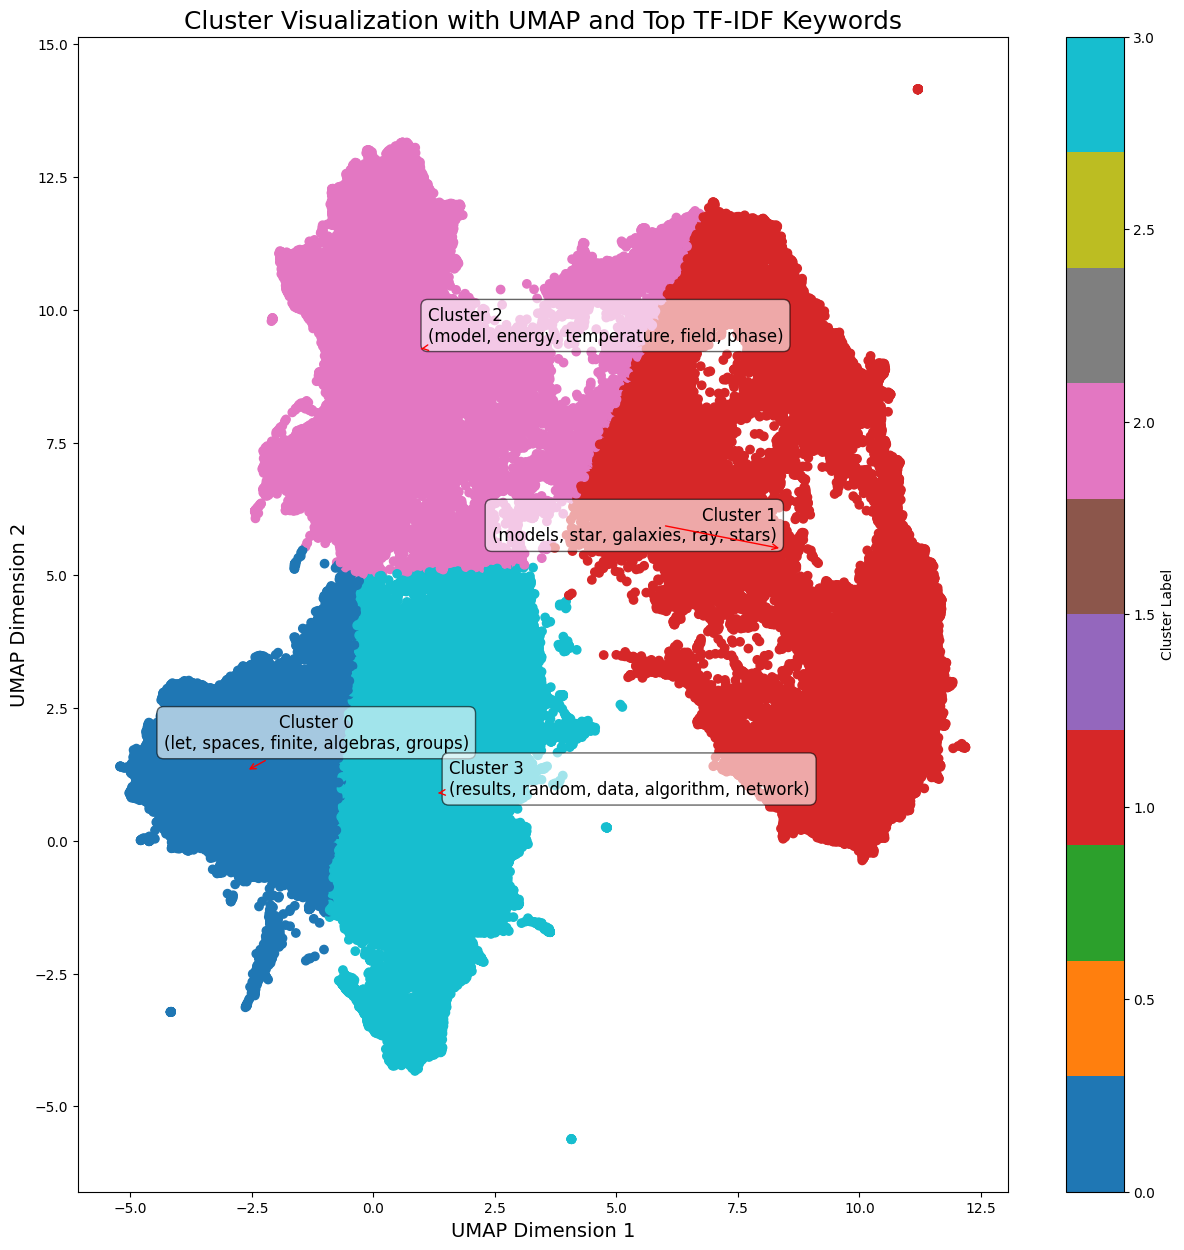

In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text  # You may need to install adjustText with pip

# Calculate cluster centers
cluster_centers = np.array([X_embedded[clusters == i].mean(axis=0) for i in range(number_of_clusters)])

# Increase the figure size for better readability
plt.figure(figsize=(15, 15))

# Use a distinct color palette
colors = plt.cm.tab10.colors  # This is a color map with distinct colors

# Plot the points with the new color map
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=clusters, cmap='tab10', marker='o')

# Collect texts for adjust_text
texts = []
for i, center in enumerate(cluster_centers):
    # Reduce the number of keywords shown to the top 3
    keywords = ', '.join(cluster_top_keywords[i].split(', ')[:5])
    text = plt.text(center[0], center[1], f'Cluster {i}\n({keywords})', fontsize=12, ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.4'))
    texts.append(text)

# Automatically adjust text to minimize overlaps
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Add a color bar with a title, and improve the aesthetics
plt.colorbar().set_label('Cluster Label')
plt.title('Cluster Visualization with UMAP and Top TF-IDF Keywords', fontsize=18)
plt.xlabel('UMAP Dimension 1', fontsize=14)
plt.ylabel('UMAP Dimension 2', fontsize=14)

# Save the plot as a vector graphic
# plt.savefig('cluster_visualization.svg', format='svg')

plt.show()


In [ ]:
df.head()

,id,title,journal-ref,categories,abstract,versions,update_date,authors_parsed,abstract_vectors,PCA_1,PCA_2,UMAP1,UMAP2,cluster
0,0704.0001,Calculation of prompt diphoton production cros...,"Phys.Rev.D76:013009,2007",hep-ph,A fully differential calculation in perturba...,"[{'created': 'Mon, 2 Apr 2007 19:18:42 GMT', '...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...","[-0.10987993, 0.025999043, -0.04958549, 0.0178...",-0.178154,0.037848,7.909154,10.228576,1
1,0704.0002,Sparsity-certifying Graph Decompositions,Unknown,math.CO cs.CG,"We describe a new algorithm, the $(k,\ell)$-...","[{'created': 'Sat, 31 Mar 2007 02:26:18 GMT', ...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]","[-0.03476779, -0.0122230835, -0.039641667, 0.0...",0.215698,-0.064663,-0.300101,-0.508724,3
2,0704.0003,The evolution of the Earth-Moon system based o...,Unknown,physics.gen-ph,The evolution of Earth-Moon system is descri...,"[{'created': 'Sun, 1 Apr 2007 20:46:54 GMT', '...",2008-01-13,"[[Pan, Hongjun, ]]","[-0.043993864, 0.017934242, -0.04744659, -0.01...",-0.225668,-0.191172,8.377263,0.911869,1
3,0704.0004,A determinant of Stirling cycle numbers counts...,Unknown,math.CO,We show that a determinant of Stirling cycle...,"[{'created': 'Sat, 31 Mar 2007 03:16:14 GMT', ...",2007-05-23,"[[Callan, David, ]]","[-0.08952105, -0.02470199, -0.07303005, -0.019...",0.245084,-0.082874,-0.739617,-1.154162,3
4,0704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,"Illinois J. Math. 52 (2008) no.2, 681-689",math.CA math.FA,In this paper we show how to compute the $\L...,"[{'created': 'Mon, 2 Apr 2007 18:09:58 GMT', '...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]","[-0.05544742, 0.0013147506, -0.02172975, -0.05...",0.262184,-0.089337,-1.276558,1.999234,0


In [ ]:
#@title ***Полиномиальная регрессия
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Преобразование даты в год и добавление в DataFrame
df['year'] = pd.to_datetime(df['update_date']).dt.year

# Группировка данных по году и кластеру, подсчет количества публикаций
cluster_year_counts = df.groupby(['cluster', 'year']).size().reset_index(name='publications')

# Вы можете выбрать один кластер для анализа или проанализировать все по очереди
for cluster in np.unique(clusters):
    data = cluster_year_counts[cluster_year_counts['cluster'] == cluster]

    # Преобразование года в полиномиальные признаки
    poly = PolynomialFeatures(degree=4)
    X_poly = poly.fit_transform(data['year'].values.reshape(-1, 1))

    # Полиномиальная регрессия
    model = LinearRegression()
    model.fit(X_poly, data['publications'])

    # Прогнозирование на будущие годы
    future_years = np.arange(2023, 2028).reshape(-1, 1)  # Например, для следующих 5 лет
    future_years_poly = poly.transform(future_years)
    predictions = model.predict(future_years_poly)

    # Вывод результатов
    print(f"Кластер {cluster}")
    for year, prediction in zip(future_years, predictions):
        print(f"Год: {year[0]}, Прогнозируемое количество публикаций: {prediction:.2f}")


Кластер 0
Год: 2023, Прогнозируемое количество публикаций: 1365.51
Год: 2024, Прогнозируемое количество публикаций: 3228.61
Год: 2025, Прогнозируемое количество публикаций: 5813.13
Год: 2026, Прогнозируемое количество публикаций: 9198.25
Год: 2027, Прогнозируемое количество публикаций: 13463.26
Кластер 1
Год: 2023, Прогнозируемое количество публикаций: 1034.42
Год: 2024, Прогнозируемое количество публикаций: 3184.08
Год: 2025, Прогнозируемое количество публикаций: 6397.61
Год: 2026, Прогнозируемое количество публикаций: 10802.17
Год: 2027, Прогнозируемое количество публикаций: 16525.07
Кластер 2
Год: 2023, Прогнозируемое количество публикаций: 1261.44
Год: 2024, Прогнозируемое количество публикаций: 3543.35
Год: 2025, Прогнозируемое количество публикаций: 6811.03
Год: 2026, Прогнозируемое количество публикаций: 11178.48
Год: 2027, Прогнозируемое количество публикаций: 16759.91
Кластер 3
Год: 2023, Прогнозируемое количество публикаций: 1506.98
Год: 2024, Прогнозируемое количество публик

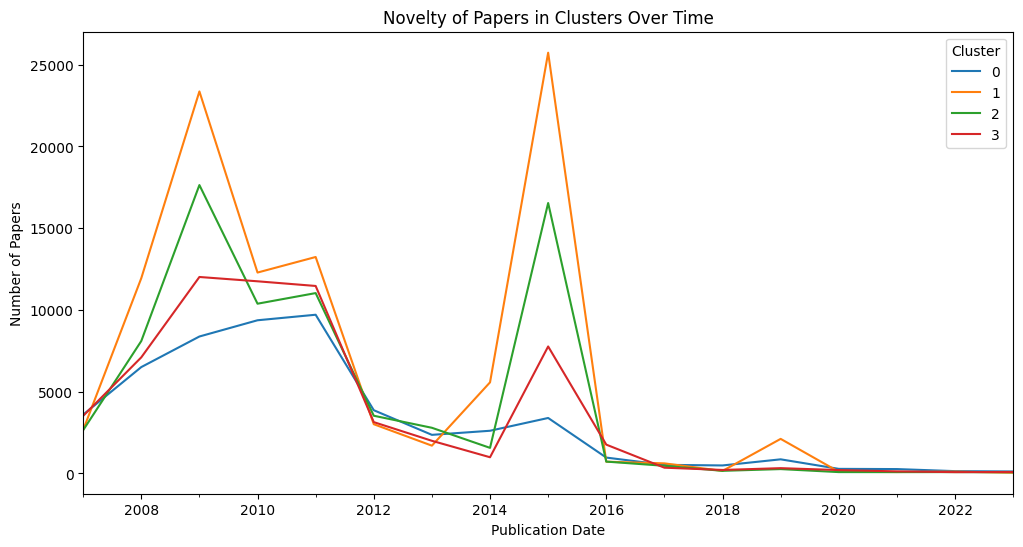

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Convert 'update_date' to datetime
df['update_date'] = pd.to_datetime(df['update_date'])

# Extract year or year-month for grouping
df['year_month'] = df['update_date'].dt.to_period('Y')

# Group by year_month and cluster, then count papers
grouped_data = df.groupby(['year_month2', 'cluster']).size().unstack(fill_value=0)

# Plotting
grouped_data.plot(kind='line', figsize=(12, 6))
plt.xlabel('Publication Date')
plt.ylabel('Number of Papers')
plt.title('Novelty of Papers in Clusters Over Time')
plt.legend(title='Cluster')
plt.show()




In [ ]:
grouped_data = df.groupby(['year_month2', 'cluster']).size().unstack(fill_value=0)

In [ ]:
df['year_month2'] = df['update_date'].dt.to_period('M')

In [ ]:
df['year_month2']

0         2008-11
1         2008-12
2         2008-01
3         2007-05
4         2013-10
           ...   
295892    2015-05
295893    2011-10
295894    2015-05
295895    2015-05
295896    2012-07
Name: year_month2, Length: 295897, dtype: period[M]

In [ ]:
import plotly.express as px

# Convert 'year_month' to string for Plotly
grouped_data.index = grouped_data.index.astype(str)

# Prepare data for Plotly
plotly_data = grouped_data.reset_index().melt(id_vars=['year_month2'], var_name='Cluster', value_name='Number of Papers')

# Create an interactive line plot with Plotly
fig = px.line(plotly_data, x='year_month2', y='Number of Papers', color='Cluster', title='Novelty of Papers in Clusters Over Time')
fig.update_xaxes(rangeslider_visible=True)  # Add range slider for easy navigation
fig.show()

In [ ]:
# Assuming 'clusters' is a NumPy array or a list with the cluster assignments for each paper
import numpy as np

# Count the number of papers in each cluster
unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Print the count of papers in each cluster
for cluster in sorted(cluster_counts):
    print(f"Cluster {cluster}: {cluster_counts[cluster]} papers")


Cluster 0: 53431 papers
Cluster 1: 103437 papers
Cluster 2: 76141 papers
Cluster 3: 62888 papers


In [ ]:
import pandas as pd

# Убедитесь, что столбец 'update_date' в формате datetime
df['update_date'] = pd.to_datetime(df['update_date'])

# Подсчет записей для каждой даты
date_counts = df.groupby(df['update_date'].dt.date).size()

# Отображение количества записей для каждой даты
print(date_counts)

# Если вам нужно найти количество записей именно для 2009 года
date_counts_2009 = date_counts[date_counts.index.year == 2009]
print(date_counts_2009)

# Или если вам нужно количество записей для конкретного месяца и года (например, ноябрь 2009)
date_counts_nov_2009 = date_counts[date_counts.index == pd.to_datetime('2009-11')]
print(date_counts_nov_2009)


update_date
2007-05-23    99397
2007-05-24        3
2007-05-25       18
2007-06-01        2
2007-06-06       18
              ...  
2023-11-06        1
2023-11-08        1
2023-11-10        1
2023-11-11        1
2023-11-15        1
Length: 3434, dtype: int64


AttributeError: ignored

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Преобразуйте столбец дат в формат datetime
df['update_date'] = pd.to_datetime(df['update_date'])

# Агрегируйте данные по месяцам (или годам) для каждого кластера
df_monthly = df.groupby(['cluster', df['update_date'].dt.to_period('M')]).size().unstack(fill_value=0)

# Проверка на стационарность и преобразование ряда, если он нестационарен
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    if result[1] <= 0.05:
        print("Ряд стационарен.")
    else:
        print("Ряд нестационарен, нужно дифференцирование.")

# Проверьте каждый кластер на стационарность
for cluster in df_monthly.index:
    print(f"Кластер: {cluster}")
    check_stationarity(df_monthly.loc[cluster])

# Допустим, ряд оказался стационарным, обучаем ARIMA
# Вам нужно будет определить p, d, q для каждого кластера
for cluster in df_monthly.index:
    model = ARIMA(df_monthly.loc[cluster], order=(1,0,1))  # Пример параметров p=1, d=0, q=1
    model_fit = model.fit()
    # Прогноз
    forecast = model_fit.forecast(steps=12)  # Прогноз на 12 месяцев вперед
    print(f"Прогноз для кластера {cluster}:")
    print(forecast)


In [ ]:
available_clusters = df_monthly.columns
print(available_clusters)


PeriodIndex(['2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10',
             '2007-11', '2007-12', '2008-01', '2008-02',
             ...
             '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07',
             '2023-08', '2023-09', '2023-10', '2023-11'],
            dtype='period[M]', name='update_date', length=199)


In [ ]:
# Выберите правильный индекс или название колонки для кластера, которое существует в вашем DataFrame
cluster_name = available_clusters[0]  # Например, выбираем первый доступный кластер
time_series = df_monthly[cluster_name]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



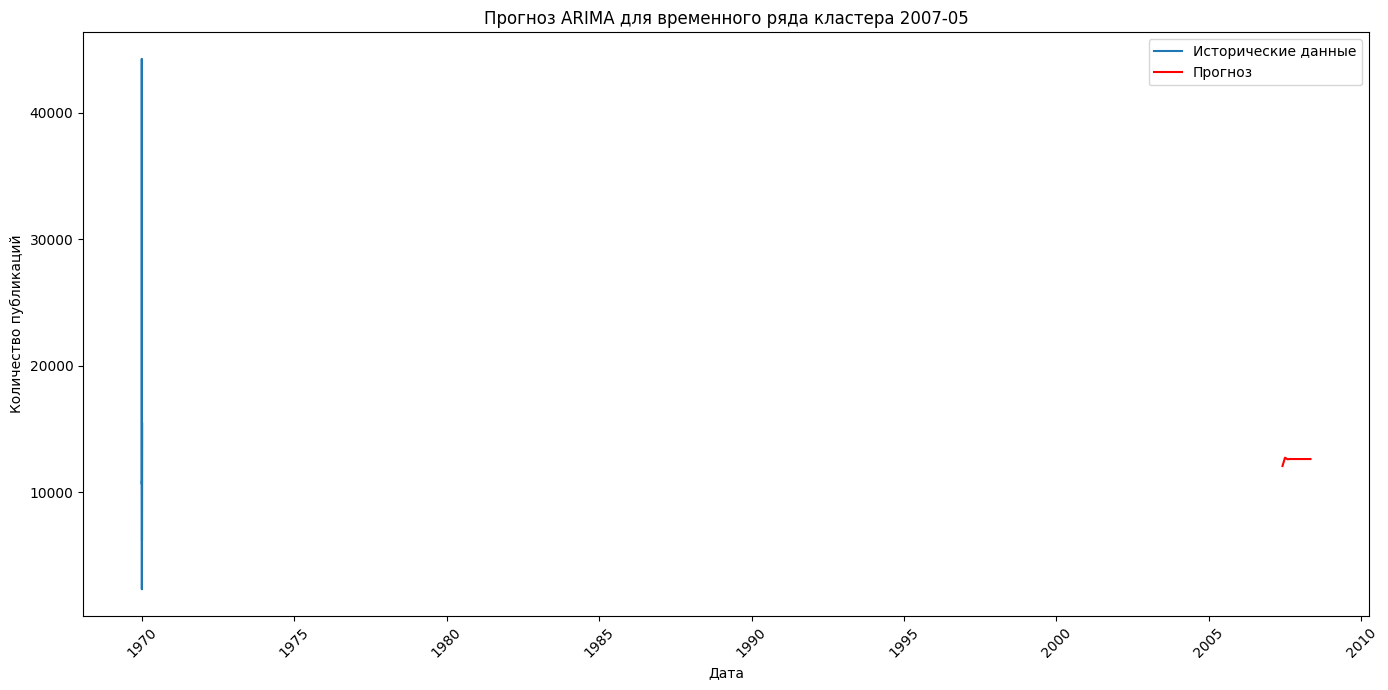

In [ ]:
# Обучение модели ARIMA
model = ARIMA(time_series, order=(1,1,1))  # Параметры (p,d,q) должны быть определены вами
model_fit = model.fit()

# Получение прогнозов
forecast = model_fit.forecast(steps=12)  # Прогноз на 12 периодов вперед

# Визуализация результатов
plt.figure(figsize=(14, 7))

# Исторические данные
plt.plot(time_series.index, time_series, label='Исторические данные')

# Прогноз
# Если ваш индекс - это PeriodIndex или DateTimeIndex, конвертируем его в Timestamp
if isinstance(time_series.index, pd.PeriodIndex):
    forecast_index = time_series.index.to_timestamp().shift(12, freq='M')
elif isinstance(time_series.index, pd.DatetimeIndex):
    forecast_index = pd.date_range(start=time_series.index[-1], periods=13, freq='M')[1:]
else:
    # Если у вас Int64Index, вам нужно будет обработать это иначе
    # Здесь нужна дополнительная информация о вашем df_monthly
    # К примеру, создаем индекс дат вручную:
    forecast_index = pd.date_range(start='2007-05', periods=len(forecast), freq='M')

plt.plot(forecast_index, forecast, label='Прогноз', color='red')

# Добавление легенды и заголовков
plt.legend()
plt.title(f'Прогноз ARIMA для временного ряда кластера {cluster_name}')
plt.xlabel('Дата')
plt.ylabel('Количество публикаций')
plt.xticks(rotation=45)
plt.tight_layout()

# Показать график
plt.show()


In [ ]:
# Предположим, что вы уже агрегировали данные и хотите просмотреть доступные кластеры
available_clusters = df_monthly.index.levels[0]  # Это если у вас MultiIndex
print(available_clusters)


AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Загрузите данные и подготовьте их как описано выше
# ...

# Пример данных временного ряда
# Предположим, что 'time_series' - это временной ряд для одного кластера
time_series = df_monthly.loc['cluster_0']

# Обучение ARIMA модели
model = ARIMA(time_series, order=(1,1,1))  # Здесь используются примерные параметры (p,d,q)
model_fit = model.fit()

# Получение прогнозов
forecast = model_fit.forecast(steps=12)  # Прогноз на 12 периодов вперед

# Визуализация результатов
plt.figure(figsize=(14, 7))

# Исторические данные
plt.plot(time_series.index.astype('str'), time_series, label='Исторические данные')

# Прогноз
forecast_index = pd.date_range(start=time_series.index[-1], periods=13, freq='M')[1:]  # Создаем индекс для прогнозных данных
plt.plot(forecast_index.astype('str'), forecast, label='Прогноз', color='red')

# Добавление легенды и заголовков
plt.legend()
plt.title('Прогноз ARIMA для временного ряда')
plt.xlabel('Дата')
plt.ylabel('Значение временного ряда')
plt.xticks(rotation=45)  # Поворот меток на оси X для лучшей читаемости
plt.tight_layout()  # Автоматическая корректировка подложки для предотвращения наложения

# Показать график
plt.show()


KeyError: ignored

In [ ]:
for file_path in file_list:
    # Загрузка исходного файла
    original_df = pd.read_parquet(file_path)

    # Загрузка соответствующего преобразованного файла PCA
    pca_file_path = f'/content/{os.path.basename(file_path).replace(".parquet", "_pca.parquet")}'
    pca_df = pd.read_parquet(pca_file_path)

    # Сброс индексов в обоих DataFrame
    original_df.reset_index(drop=True, inplace=True)
    pca_df.reset_index(drop=True, inplace=True)

    # Объединение исходных данных с результатами PCA
    merged_df = pd.concat([original_df, pca_df], axis=1)

    # Сохранение объединенного файла
    merged_df.to_parquet(f'/content/{os.path.basename(file_path).replace(".parquet", "_merged.parquet")}')


In [ ]:
vector_matrix = ddf['abstract_vectors']

In [ ]:
import pandas as pd
from sklearn.decomposition import IncrementalPCA
import dask.dataframe as dd
import math
from tqdm import tqdm

# Assuming 'ddf' is your Dask DataFrame

# Initialize Incremental PCA
n_components = 2  # Number of components to keep
ipca = IncrementalPCA(n_components=n_components)

# Determine batch size
total_rows = len(ddf)
batch_size = 500 # Adjust based on your memory capacity
num_batches = math.ceil(total_rows / batch_size)

# Process in batches
for batch_idx in tqdm(range(num_batches), desc="Processing Incremental PCA batches"):
    # Compute a single batch
    start_idx = batch_idx * batch_size
    end_idx = start_idx + batch_size
    batch_df = ddf.loc[start_idx:end_idx]

    # Convert lists to DataFrame
    X_batch = pd.DataFrame(batch_df['abstract_vectors'].tolist())

    # Partial fit on the batch
    ipca.partial_fit(X_batch)

# Transform the entire dataset in batches
pca_results = []
for batch_idx in tqdm(range(num_batches), desc="Transforming with Incremental PCA"):
    start_idx = batch_idx * batch_size
    end_idx = start_idx + batch_size
    batch_df = ddf.loc[start_idx:end_idx]
    X_batch = pd.DataFrame(batch_df['abstract_vectors'].tolist())

    # Transform and store the batch results
    transformed_batch = ipca.transform(X_batch)
    pca_df = pd.DataFrame(transformed_batch, columns=['PCA_1', 'PCA_2'], index=batch_df.index)
    pca_results.append(pca_df)

# Concatenate all PCA results
pca_results_df = pd.concat(pca_results)




Processing Incremental PCA batches:  13%|█▎        | 75/592 [00:17<02:03,  4.20it/s]


KeyboardInterrupt: ignored

In [ ]:
file_list = [
    '/content/drive/MyDrive/vectorized_papers/vectorized_1.parquet',
    '/content/drive/MyDrive/vectorized_papers/vectorized_2.parquet',
    '/content/drive/MyDrive/vectorized_papers/vectorized_3.parquet',
    '/content/drive/MyDrive/vectorized_papers/vectorized_4.parquet',
    '/content/drive/MyDrive/vectorized_papers/vectorized_5.parquet',
    '/content/drive/MyDrive/vectorized_papers/vectorized_6.parquet',
    '/content/drive/MyDrive/vectorized_papers/vectorized_7.parquet',
    '/content/drive/MyDrive/vectorized_papers/vectorized_8.parquet'
]

In [ ]:
#@title Загрузка, обработка и сохранение каждого файла с PCA
import pandas as pd
from sklearn.decomposition import IncrementalPCA
import math
from tqdm import tqdm
import gc
import os

# Инициализация Incremental PCA
n_components = 2
ipca = IncrementalPCA(n_components=n_components)

file_list = [
    '/content/drive/MyDrive/vectorized_papers/vectorized_1.parquet',
    '/content/drive/MyDrive/vectorized_papers/vectorized_2.parquet',
    '/content/drive/MyDrive/vectorized_papers/vectorized_3.parquet',
    '/content/drive/MyDrive/vectorized_papers/vectorized_4.parquet',
    '/content/drive/MyDrive/vectorized_papers/vectorized_5.parquet',
    '/content/drive/MyDrive/vectorized_papers/vectorized_6.parquet',
    '/content/drive/MyDrive/vectorized_papers/vectorized_7.parquet',
    '/content/drive/MyDrive/vectorized_papers/vectorized_8.parquet'
]

# Размер пакета для обработки
batch_size = 500

for file_path in file_list:
    # Загрузка файла
    ddf = pd.read_parquet(file_path)

    # Общее количество строк
    total_rows = len(ddf)
    num_batches = math.ceil(total_rows / batch_size)

    pca_results = []

    # Обработка файла пакетами
    for batch_idx in tqdm(range(num_batches), desc=f"Обработка файла {file_path}"):
        start_idx = batch_idx * batch_size
        end_idx = start_idx + batch_size
        batch_df = ddf[start_idx:end_idx]

        # Преобразование списков в DataFrame
        X_batch = pd.DataFrame(batch_df['abstract_vectors'].tolist())

        # Применение и трансформация PCA
        ipca.partial_fit(X_batch)
        transformed_batch = ipca.transform(X_batch)

        # Сохранение результатов трансформации
        pca_df = pd.DataFrame(transformed_batch, columns=['PCA_1', 'PCA_2'])
        pca_results.append(pca_df)

    # Сохранение результатов в новый файл
    pca_results_df = pd.concat(pca_results)
    pca_results_df.to_parquet(f'/content/{os.path.basename(file_path).replace(".parquet", "_pca.parquet")}')

    # Очистка ОЗУ
    del ddf, pca_results, pca_results_df
    gc.collect()


Обработка файла /content/drive/MyDrive/vectorized_papers/vectorized_1.parquet: 100%|██████████| 592/592 [02:38<00:00,  3.73it/s]
Обработка файла /content/drive/MyDrive/vectorized_papers/vectorized_2.parquet: 100%|██████████| 592/592 [02:35<00:00,  3.80it/s]
Обработка файла /content/drive/MyDrive/vectorized_papers/vectorized_3.parquet: 100%|██████████| 592/592 [02:39<00:00,  3.71it/s]
Обработка файла /content/drive/MyDrive/vectorized_papers/vectorized_4.parquet: 100%|██████████| 592/592 [02:38<00:00,  3.73it/s]
Обработка файла /content/drive/MyDrive/vectorized_papers/vectorized_5.parquet: 100%|██████████| 592/592 [02:41<00:00,  3.66it/s]
Обработка файла /content/drive/MyDrive/vectorized_papers/vectorized_6.parquet: 100%|██████████| 592/592 [02:43<00:00,  3.62it/s]
Обработка файла /content/drive/MyDrive/vectorized_papers/vectorized_7.parquet: 100%|██████████| 592/592 [02:43<00:00,  3.62it/s]
Обработка файла /content/drive/MyDrive/vectorized_papers/vectorized_8.parquet: 100%|██████████| 5

In [ ]:
# Merge PCA results back into original DataFrame
merged_df = ddf.merge(pca_results_df, left_index=True, right_index=True)

In [ ]:
merged_df.head()

,id,title,journal-ref,categories,abstract,versions,update_date,authors_parsed,abstract_vectors,PCA_1,PCA_2
0,0704.0001,Calculation of prompt diphoton production cros...,"Phys.Rev.D76:013009,2007",hep-ph,A fully differential calculation in perturba...,"[{'created': 'Mon, 2 Apr 2007 19:18:42 GMT', '...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...","[-0.10987993, 0.025999043, -0.04958549, 0.0178...",-0.214161,0.018588
1,0704.0002,Sparsity-certifying Graph Decompositions,Unknown,math.CO cs.CG,"We describe a new algorithm, the $(k,\ell)$-...","[{'created': 'Sat, 31 Mar 2007 02:26:18 GMT', ...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]","[-0.03476779, -0.0122230835, -0.039641667, 0.0...",0.233982,-0.049333
2,0704.0003,The evolution of the Earth-Moon system based o...,Unknown,physics.gen-ph,The evolution of Earth-Moon system is descri...,"[{'created': 'Sun, 1 Apr 2007 20:46:54 GMT', '...",2008-01-13,"[[Pan, Hongjun, ]]","[-0.043993864, 0.017934242, -0.04744659, -0.01...",-0.203642,-0.208757
3,0704.0004,A determinant of Stirling cycle numbers counts...,Unknown,math.CO,We show that a determinant of Stirling cycle...,"[{'created': 'Sat, 31 Mar 2007 03:16:14 GMT', ...",2007-05-23,"[[Callan, David, ]]","[-0.08952105, -0.02470199, -0.07303005, -0.019...",0.253222,-0.031014
4,0704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,"Illinois J. Math. 52 (2008) no.2, 681-689",math.CA math.FA,In this paper we show how to compute the $\L...,"[{'created': 'Mon, 2 Apr 2007 18:09:58 GMT', '...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]","[-0.05544742, 0.0013147506, -0.02172975, -0.05...",0.266111,-0.048196


In [ ]:
#@title Установка зависимостей и загрузка модели

from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import umap
import pandas as pd

tokenizer = AutoTokenizer.from_pretrained('BAAI/bge-small-en-v1.5')
model = AutoModel.from_pretrained('BAAI/bge-small-en-v1.5')

In [ ]:
#@title Скачивание датасета с Hugging Face
!mkdir dataset
%cd /content/dataset
# !wget https://huggingface.co/datasets/CCRs/arXiv_dataset/resolve/main/data/train-00000-of-00008.parquet
!wget https://huggingface.co/datasets/CCRs/arXiv_dataset/resolve/main/data/train-00001-of-00008.parquet
!wget https://huggingface.co/datasets/CCRs/arXiv_dataset/resolve/main/data/train-00002-of-00008.parquet
!wget https://huggingface.co/datasets/CCRs/arXiv_dataset/resolve/main/data/train-00003-of-00008.parquet
!wget https://huggingface.co/datasets/CCRs/arXiv_dataset/resolve/main/data/train-00004-of-00008.parquet
!wget https://huggingface.co/datasets/CCRs/arXiv_dataset/resolve/main/data/train-00005-of-00008.parquet
!wget https://huggingface.co/datasets/CCRs/arXiv_dataset/resolve/main/data/train-00006-of-00008.parquet
!wget https://huggingface.co/datasets/CCRs/arXiv_dataset/resolve/main/data/train-00007-of-00008.parquet

In [ ]:
import pandas as pd

# List of file names
# file_list = [
#     '/content/dataset/train-00000-of-00008.parquet', +
#     '/content/dataset/train-00001-of-00008.parquet', +
#     '/content/dataset/train-00002-of-00008.parquet', +
#     '/content/dataset/train-00003-of-00008.parquet', +
#     '/content/dataset/train-00004-of-00008.parquet', +
#     '/content/dataset/train-00005-of-00008.parquet', +
#     '/content/dataset/train-00006-of-00008.parquet', +
#     '/content/dataset/train-00007-of-00008.parquet', -
# ]

# Load and concatenate the datasets
paper_data = pd.concat([pd.read_parquet('/content/dataset/train-00007-of-00008.parquet')], ignore_index=True)


#print(paper_data.sample(5))

In [ ]:
paper_data.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,cond-mat/0411606,David Horsell,"D. W. Horsell (1), A. K. Savchenko (1), Y. M. ...",Spontaneous current generation in gated nanost...,None,None,10.1209/epl/i2005-10115-2,None,cond-mat.mes-hall,None,We have observed an unusual dc current spont...,"[{'version': 'v1', 'created': 'Wed, 24 Nov 200...",2009-11-10,"[[Horsell, D. W., ], [Savchenko, A. K., ], [Ga..."
1,cond-mat/0411607,Alexander Zorin,"A.B. Zorin, M.I. Khabipov, D.V. Balashov, R. D...",Josephson tunnel junctions with nonlinear damp...,4 pages incl. 3 figures,"Appl. Phys. Lett. v.86, 032501 (2005)",10.1063/1.1852076,None,cond-mat.supr-con,None,We demonstrate that shunting of Superconduct...,"[{'version': 'v1', 'created': 'Wed, 24 Nov 200...",2007-05-23,"[[Zorin, A. B., ], [Khabipov, M. I., ], [Balas..."
2,cond-mat/0411608,E. V. Sampathkumaran,"Kausik Sengupta, S. Rayaprol and E.V. Sampathk...",Large magnetoresistance in the magnetically or...,"Europhyics Letters, in press",None,10.1209/epl/i2004-10358-3,None,cond-mat.str-el cond-mat.mtrl-sci,None,We report the response of electrical resisti...,"[{'version': 'v1', 'created': 'Wed, 24 Nov 200...",2009-11-10,"[[Sengupta, Kausik, ], [Rayaprol, S., ], [Samp..."
3,cond-mat/0411609,Paula Havu,"Paula Havu, Noora Tuomisto, Riikka Vaananen, M...",Spin dependent electron transport through a ma...,13 pages and 12 figures,None,10.1103/PhysRevB.71.235301,None,cond-mat.mes-hall cond-mat.mtrl-sci,None,Electron transport properties in nanostructu...,"[{'version': 'v1', 'created': 'Wed, 24 Nov 200...",2009-11-10,"[[Havu, Paula, ], [Tuomisto, Noora, ], [Vaanan..."
4,cond-mat/0411610,Ronald Dickman,Ronald Dickman and Marcelo Martins de Oliveira,Quasi-stationary simulation of the contact pro...,"9 pages, 4 figures",None,10.1016/j.physa.2005.05.051,None,cond-mat.stat-mech,None,We review a recently devised Monte Carlo sim...,"[{'version': 'v1', 'created': 'Wed, 24 Nov 200...",2009-11-10,"[[Dickman, Ronald, ], [de Oliveira, Marcelo Ma..."


In [ ]:
sliced_paper_data = paper_data.drop(columns=['doi', 'report-no','comments','submitter','license','authors'])

In [ ]:
sliced_paper_data['journal-ref'].fillna('Unknown', inplace=True)

In [ ]:
# Check for missing values in each column
missing_values = sliced_paper_data.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

id                0
title             0
journal-ref       0
categories        0
abstract          0
versions          0
update_date       0
authors_parsed    0
dtype: int64


In [ ]:
import torch

# Check if CUDA (GPU support) is available
cuda_available = torch.cuda.is_available()
print(f"CUDA available: {cuda_available}")

# If available, print the GPU name
if cuda_available:
    print(f"GPU: {torch.cuda.get_device_name(0)}")

CUDA available: True
GPU: Tesla T4


In [ ]:
if cuda_available:
    model = model.to('cuda')
else:
    print("Running on CPU")

def vectorize_batch(texts, tokenizer, model):
    # Tokenize sentences
    encoded_input = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    # Move encoded input to GPU if available
    if cuda_available:
        encoded_input = {key: val.to('cuda') for key, val in encoded_input.items()}

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    # Perform pooling and normalization
    sentence_embeddings = model_output[0][:, 0]
    sentence_embeddings = torch.nn.functional.normalize(sentence_embeddings, p=2, dim=1)

    # Move embeddings back to CPU
    return sentence_embeddings.cpu().numpy()

In [ ]:
sliced_paper_data.head()

,id,title,journal-ref,categories,abstract,versions,update_date,authors_parsed
0,cond-mat/0411606,Spontaneous current generation in gated nanost...,Unknown,cond-mat.mes-hall,We have observed an unusual dc current spont...,"[{'version': 'v1', 'created': 'Wed, 24 Nov 200...",2009-11-10,"[[Horsell, D. W., ], [Savchenko, A. K., ], [Ga..."
1,cond-mat/0411607,Josephson tunnel junctions with nonlinear damp...,"Appl. Phys. Lett. v.86, 032501 (2005)",cond-mat.supr-con,We demonstrate that shunting of Superconduct...,"[{'version': 'v1', 'created': 'Wed, 24 Nov 200...",2007-05-23,"[[Zorin, A. B., ], [Khabipov, M. I., ], [Balas..."
2,cond-mat/0411608,Large magnetoresistance in the magnetically or...,Unknown,cond-mat.str-el cond-mat.mtrl-sci,We report the response of electrical resisti...,"[{'version': 'v1', 'created': 'Wed, 24 Nov 200...",2009-11-10,"[[Sengupta, Kausik, ], [Rayaprol, S., ], [Samp..."
3,cond-mat/0411609,Spin dependent electron transport through a ma...,Unknown,cond-mat.mes-hall cond-mat.mtrl-sci,Electron transport properties in nanostructu...,"[{'version': 'v1', 'created': 'Wed, 24 Nov 200...",2009-11-10,"[[Havu, Paula, ], [Tuomisto, Noora, ], [Vaanan..."
4,cond-mat/0411610,Quasi-stationary simulation of the contact pro...,Unknown,cond-mat.stat-mech,We review a recently devised Monte Carlo sim...,"[{'version': 'v1', 'created': 'Wed, 24 Nov 200...",2009-11-10,"[[Dickman, Ronald, ], [de Oliveira, Marcelo Ma..."


In [ ]:
from tqdm import tqdm
import pandas as pd

# Define the batch size
batch_size = 100 # Example batch size

# Calculate the total number of batches for 10% of the dataset
total_data = int(len(sliced_paper_data['abstract']))  # 10% of the dataset
total_batches = (total_data + batch_size - 1) // batch_size

# Initialize an empty list to store all vectors
all_abstract_vectors = []

# Use tqdm for the progress bar
for i in tqdm(range(0, total_data, batch_size), total=total_batches, desc="Processing"):
    # Slice the batch
    batch_abstracts = sliced_paper_data['abstract'][i:i + batch_size].tolist()

    # Vectorize the batch
    batch_vectors = vectorize_batch(batch_abstracts, tokenizer, model)
    all_abstract_vectors.extend(batch_vectors)

# Convert the list of vectors to a pandas Series and add it to the DataFrame
sliced_paper_data['abstract_vectors'] = pd.Series(all_abstract_vectors)


Processing: 100%|██████████| 2959/2959 [53:27<00:00,  1.08s/it]


In [ ]:
sliced_paper_data.shape

(295897, 9)

In [ ]:
%cd /content

/content


In [ ]:
!mkdir dataset_final

mkdir: cannot create directory ‘dataset_final’: File exists


In [ ]:
%cd /content/dataset_final

/content/dataset_final


In [ ]:
file_index = 8

In [ ]:
sliced_paper_data.to_parquet(f'vectorized_{file_index}.parquet')

Mounted at /content/drive


In [ ]:
import shutil
source_path = f'/content/dataset_final/vectorized_{file_index}.parquet'  # Replace with your source file path
destination_path = '/content/drive/MyDrive/vectorized_papers'  # Replace with your destination folder path
shutil.copy(source_path, destination_path)

'/content/drive/MyDrive/vectorized_papers/vectorized_8.parquet'

In [ ]:
sliced_paper_data.head()

,id,title,journal-ref,categories,abstract,versions,update_date,authors_parsed,abstract_vectors
0,cond-mat/0411606,Spontaneous current generation in gated nanost...,Unknown,cond-mat.mes-hall,We have observed an unusual dc current spont...,"[{'version': 'v1', 'created': 'Wed, 24 Nov 200...",2009-11-10,"[[Horsell, D. W., ], [Savchenko, A. K., ], [Ga...","[-0.040682323, 0.1448392, 0.019788671, -0.0002..."
1,cond-mat/0411607,Josephson tunnel junctions with nonlinear damp...,"Appl. Phys. Lett. v.86, 032501 (2005)",cond-mat.supr-con,We demonstrate that shunting of Superconduct...,"[{'version': 'v1', 'created': 'Wed, 24 Nov 200...",2007-05-23,"[[Zorin, A. B., ], [Khabipov, M. I., ], [Balas...","[-0.050856303, 0.06816196, 0.01384356, 0.02344..."
2,cond-mat/0411608,Large magnetoresistance in the magnetically or...,Unknown,cond-mat.str-el cond-mat.mtrl-sci,We report the response of electrical resisti...,"[{'version': 'v1', 'created': 'Wed, 24 Nov 200...",2009-11-10,"[[Sengupta, Kausik, ], [Rayaprol, S., ], [Samp...","[-0.055489883, 0.058684636, 0.015026117, 0.013..."
3,cond-mat/0411609,Spin dependent electron transport through a ma...,Unknown,cond-mat.mes-hall cond-mat.mtrl-sci,Electron transport properties in nanostructu...,"[{'version': 'v1', 'created': 'Wed, 24 Nov 200...",2009-11-10,"[[Havu, Paula, ], [Tuomisto, Noora, ], [Vaanan...","[-0.05190075, 0.05946363, -0.03091885, -0.0074..."
4,cond-mat/0411610,Quasi-stationary simulation of the contact pro...,Unknown,cond-mat.stat-mech,We review a recently devised Monte Carlo sim...,"[{'version': 'v1', 'created': 'Wed, 24 Nov 200...",2009-11-10,"[[Dickman, Ronald, ], [de Oliveira, Marcelo Ma...","[-0.085758366, 0.025453161, -0.0011709598, 0.0..."
